In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Fusión de características

In [ ]:
# 1. Importación de librerías necesarias
import pandas as pd
import numpy as np


In [ ]:
processed_path_train = '/content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/data/2_train_df_clean.csv'
train_df = pd.read_csv(processed_path_train)
print("Cargado conjunto de entrenamiento. Dimensiones:", train_df.shape)

Cargado conjunto de entrenamiento. Dimensiones: (44129, 79)


In [ ]:
for col in train_df.columns:
    print(f"\nColumna: {col}")
    print(train_df[col].unique())


Columna: hhlanguage
['English' 'Spanish' 'Other']

Columna: sc_age_years
[13 12  4  6  9  5 15 14 10  8  3  1 11 16  2 17  7  0]

Columna: sc_sex
['Male' 'Female']

Columna: birth_yr
[2009 2010 2018 2017 2014 2019 2008 2013 2011 2022 2020 2007 2012 2021
 2006 2016 2015 2005 2023]

Columna: a1_age
[51 49 39 28 33 47 38 50 43 37 41 42 40 45 23 27 48 30 32 35 36 44 53 46
 31 34 55 62 63 69 68 21 57 29 26 54 59 67 56 58 52 22 24 64 60 66 65 61
 25 18 19 20]

Columna: memorycond
['No' 'Yes']

Columna: allergies
['Yes' 'No']

Columna: k2q40a
['No' 'Yes']

Columna: autoimmune
['No' 'Yes']

Columna: headache
['No' 'Yes']

Columna: k2q33a
['No' 'Yes']

Columna: k2q33b
['Logical skip' 'Yes' 'No']

Columna: k2q32a
['No' 'Yes']

Columna: k2q32b
['Logical skip' 'Yes' 'No']

Columna: k2q34a
['No' 'Yes']

Columna: k2q34b
['Logical skip' 'Yes' 'No']

Columna: k2q31a
['No' 'Yes']

Columna: k2q31b
['Logical skip' 'Yes' 'No']

Columna: k2q31d
['Logical skip' 'Yes' 'No']

Columna: addtreat
['Logical skip

In [ ]:
# --- CASO 1: Ansiedad ---
def map_ansiedad(a, b):
    if a == "No":
        return "Nunca diagnosticado"
    elif a == "Yes" and b == "Yes":
        return "Diagnosticado y lo tiene actualmente"
    elif a == "Yes" and b == "No":
        return "Diagnosticado pero ya no lo tiene"
    elif a == "Yes" and b == "Logical skip":
        return "Diagnosticado pero estado actual desconocido"
    return "Desconocido"

train_df["ansiedad_status"] = train_df.apply(lambda row: map_ansiedad(row["k2q33a"], row["k2q33b"]), axis=1)
# --- CASO 2: Depresión ---
def map_depresion(a, b):
    if a == "No":
        return "Nunca diagnosticado"
    elif a == "Yes" and b == "Yes":
        return "Diagnosticado y lo tiene actualmente"
    elif a == "Yes" and b == "No":
        return "Diagnosticado pero ya no lo tiene"
    elif a == "Yes" and b == "Logical skip":
        return "Diagnosticado pero estado actual desconocido"
    return "Desconocido"

train_df["depresion_status"] = train_df.apply(lambda row: map_depresion(row["k2q32a"], row["k2q32b"]), axis=1)


# --- CASO 3: Problemas de conducta ---
def map_conducta(a, b, c):
    if a == "No":
        return "Nunca diagnosticado"
    elif a == "Yes" and b == "No":
        return "Diagnosticado pero ya no lo tiene"
    elif a == "Yes" and b == "Yes":
        if c == "Mild":
            return "Lo tiene actualmente, leve"
        elif c == "Moderate":
            return "Lo tiene actualmente, moderado"
        elif c == "Severe":
            return "Lo tiene actualmente, grave"
        elif c == "Logical skip":
            return "Diagnóstico actual, severidad desconocida"
    elif a == "Yes" and b == "Logical skip" and c == "Logical skip":
        return "Alguna vez diagnosticado (estado actual desconocido)"
    return "Desconocido"

train_df["conducta_status"] = train_df.apply(lambda row: map_conducta(row["k2q34a"], row["k2q34b"], row["k2q34c"]), axis=1)

# --- CASO 4: TDAH ---
def map_adhd_status(a, b, c):
    if a == "No":
        return "Nunca diagnosticado"
    elif a == "Yes" and b == "No":
        return "Diagnosticado pero ya no lo tiene"
    elif b == "Yes" and c == "Mild":
        return "Lo tiene actualmente, leve"
    elif b == "Yes" and c == "Moderate":
        return "Lo tiene actualmente, moderado"
    elif b == "Yes" and c == "Severe":
        return "Lo tiene actualmente, grave"
    elif a == "Yes" and (b == "Logical skip" or c == "Logical skip"):
        return "Diagnosticado pero estado actual desconocido"
    return "Desconocido"

train_df["adhd_status"] = train_df.apply(
    lambda row: map_adhd_status(row["k2q31a"], row["k2q31b"], row["k2q31c"]), axis=1
)


def map_adhd_medicated(a, d):
    if a == "No":
        return "Nunca diagnosticado"
    elif d == "Yes":
        return "Diagnosticado y actualmente en tratamiento"
    elif d == "No" or d == "Logical skip":
        return "Diagnosticado pero sin tratamiento"
    else:
        return "Desconocido"

train_df["adhd_medicated"] = train_df.apply(
    lambda row: map_adhd_medicated(row["k2q31a"], row["k2q31d"]), axis=1
)

# --- CASO 5: Educación especial ---
def map_educacion(k6q15, sescurrsvc):
    if k6q15 == "No":
        return "Nunca ha tenido plan especial de educación"
    elif k6q15 == "Yes" and sescurrsvc == "No" or sescurrsvc == "Logical skip":
        return "Tuvo plan, ya no recibe servicios de educación especial"
    elif k6q15 == "Yes" and sescurrsvc == "Yes":
        return "Tiene plan y recibe servicios de educación especial"
    return "Desconocido"

train_df["educacion_especial_status"] = train_df.apply(lambda row: map_educacion(row["k6q15"], row["sescurrsvc"]), axis=1)



In [ ]:
for col in train_df.columns:
    print(f"\nColumna: {col}")
    print(train_df[col].unique())


Columna: hhlanguage
['English' 'Spanish' 'Other']

Columna: sc_age_years
[13 12  4  6  9  5 15 14 10  8  3  1 11 16  2 17  7  0]

Columna: sc_sex
['Male' 'Female']

Columna: birth_yr
[2009 2010 2018 2017 2014 2019 2008 2013 2011 2022 2020 2007 2012 2021
 2006 2016 2015 2005 2023]

Columna: a1_age
[51 49 39 28 33 47 38 50 43 37 41 42 40 45 23 27 48 30 32 35 36 44 53 46
 31 34 55 62 63 69 68 21 57 29 26 54 59 67 56 58 52 22 24 64 60 66 65 61
 25 18 19 20]

Columna: memorycond
['No' 'Yes']

Columna: allergies
['Yes' 'No']

Columna: k2q40a
['No' 'Yes']

Columna: autoimmune
['No' 'Yes']

Columna: headache
['No' 'Yes']

Columna: k2q33a
['No' 'Yes']

Columna: k2q33b
['Logical skip' 'Yes' 'No']

Columna: k2q32a
['No' 'Yes']

Columna: k2q32b
['Logical skip' 'Yes' 'No']

Columna: k2q34a
['No' 'Yes']

Columna: k2q34b
['Logical skip' 'Yes' 'No']

Columna: k2q31a
['No' 'Yes']

Columna: k2q31b
['Logical skip' 'Yes' 'No']

Columna: k2q31d
['Logical skip' 'Yes' 'No']

Columna: addtreat
['Logical skip

In [ ]:
# Guardar el DataFrame  en Google Drive
output_path = "/content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/data/3_train_df_logical_skips.csv"
train_df.to_csv(output_path, index=False)

print(f"✅ Dataset guardado en: {output_path}")

✅ Dataset guardado en: /content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/data/3_train_df_logical_skips.csv


# Análisis Estadísticos Descriptivos

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd

# Resumen estadístico general
print("Resumen estadístico de todas las variables numéricas:")
print(train_df.describe())

# Obtener la moda de cada variable
modas = train_df.mode().iloc[0]  # La moda puede tener más de un valor, tomamos el primero
print("\nModa de cada variable:")
print(modas)

# Revisar estadísticas de variables categóricas
print("\nConteo de valores únicos por cada variable categórica:")
for col in train_df.select_dtypes(include=['object']).columns:
    print(f"{col}: {train_df[col].nunique()} valores únicos")

Resumen estadístico de todas las variables numéricas:
       sc_age_years      birth_yr        a1_age        fpl_i1
count  44129.000000  44129.000000  44129.000000  44129.000000
mean       8.341544   2014.268395     41.368805    207.873258
std        5.313594      5.335119      8.577604     68.117317
min        0.000000   2005.000000     18.000000     51.000000
25%        4.000000   2009.000000     35.000000    190.000000
50%        8.000000   2015.000000     40.000000    190.000000
75%       13.000000   2019.000000     46.000000    222.000000
max       17.000000   2023.000000     69.000000    399.000000

Moda de cada variable:
hhlanguage                                                      English
sc_age_years                                                          2
sc_sex                                                             Male
birth_yr                                                           2021
a1_age                                                               40
    

In [ ]:
#Normalizacion de valores nulos realizada
import pandas as pd
import numpy as np

# Lista de valores considerados como nulos
valores_nulos = [np.nan,  "Not in universe", "No valid response"]

# Función para contar valores no deseados en cada columna
def verificar_nulos(train_df):
    print("🔍 Verificando valores nulos y no deseados en el DataFrame...\n")
    nulos_totales = train_df.isnull().sum()  # Contar valores NaN
    valores_no_deseados = train_df.isin(valores_nulos).sum()  # Contar otros valores no deseados

    # Unir ambos resultados
    resultado = pd.DataFrame({
        "NaN": nulos_totales,
        "Not in universe": train_df.isin(["Not in universe"]).sum(),
        "No valid response": train_df.isin(["No valid response"]).sum(),
        "Total no válidos": nulos_totales + valores_no_deseados
    })

    # Filtrar solo columnas con valores no deseados
    resultado = resultado[resultado["Total no válidos"] > 0]

    if resultado.empty:
        print("✅ No hay valores nulos ni no deseados en el DataFrame.")
    else:
        print("⚠️ Se encontraron valores no deseados en las siguientes columnas:\n")
        print(resultado)

# Llamar a la función con tu DataFrame
verificar_nulos(train_df)


🔍 Verificando valores nulos y no deseados en el DataFrame...

✅ No hay valores nulos ni no deseados en el DataFrame.


In [ ]:
# Variables Categóricas
categoricas = [
    "hhlanguage", "sc_sex", "a1_marital", "a1_relation", "k3q04_r",
    "grades", "sc_racer", "family_r", "birthwt", "birth_yr_f", "fpl_group"
]

# Variables Binarias
binarias = [
    "memorycond", "allergies", "k2q40a", "autoimmune", "headache", "k2q33a",
    "k2q33b", "k2q32a", "k2q32b", "k2q34a", "k2q34b", "k2q31a", "k2q31b",
    "k2q31d", "addtreat", "concussion", "confirminjury", "k4q23", "k6q15",
    "sescurrsvc", "ace9", "a1_born", "sc_k2q22", "birthwt_l"
]

# Variables Numéricas
numericas = [
    "sc_age_years", "a1_age", "fpl_i1"
]

# Variables Ordinales (Texto)
ordinales = [
    "cerpals_desc", "k2q34c", "k2q31c", "a1_grade", "a1_menthealth", "k6q73_r",
    "k6q71_r", "k7q84_r", "k7q85_r", "k7q82_r", "k7q83_r", "k7q70_r", "bullied_r",
    "focuson", "nameemotions", "temper_r", "calmdown_r", "waitforturn", "hardwork",
    "sharetoys", "talkabout", "wktosolve", "k8q31", "makefriend", "sc_english",
    "higrade", "k8q32", "k8q34", "k7q04r_r", "outdoorswkday", "outdoorswkend",
    "screentime", "hcability", "k8q21", "k8q30", "k7q33", "bedtime", "agepos4",
    "a1_physhealth", "a1_menthealth", "ansiedad_status", "depresion_status",
    "conducta_status", "adhd_status", "adhd_medicated", "educacion_especial_status"
]

# Variables Temporales
temporales = [
    "birth_yr"
]


In [ ]:
for col in train_df.columns:
    print(f"\nColumna: {col}")
    print(train_df[col].unique())


Columna: hhlanguage
['English' 'Spanish' 'Other']

Columna: sc_age_years
[13 12  4  6  9  5 15 14 10  8  3  1 11 16  2 17  7  0]

Columna: sc_sex
['Male' 'Female']

Columna: birth_yr
[2009 2010 2018 2017 2014 2019 2008 2013 2011 2022 2020 2007 2012 2021
 2006 2016 2015 2005 2023]

Columna: a1_age
[51 49 39 28 33 47 38 50 43 37 41 42 40 45 23 27 48 30 32 35 36 44 53 46
 31 34 55 62 63 69 68 21 57 29 26 54 59 67 56 58 52 22 24 64 60 66 65 61
 25 18 19 20]

Columna: memorycond
['No' 'Yes']

Columna: allergies
['Yes' 'No']

Columna: k2q40a
['No' 'Yes']

Columna: autoimmune
['No' 'Yes']

Columna: headache
['No' 'Yes']

Columna: k2q33a
['No' 'Yes']

Columna: k2q33b
['Logical skip' 'Yes' 'No']

Columna: k2q32a
['No' 'Yes']

Columna: k2q32b
['Logical skip' 'Yes' 'No']

Columna: k2q34a
['No' 'Yes']

Columna: k2q34b
['Logical skip' 'Yes' 'No']

Columna: k2q31a
['No' 'Yes']

Columna: k2q31b
['Logical skip' 'Yes' 'No']

Columna: k2q31d
['Logical skip' 'Yes' 'No']

Columna: addtreat
['Logical skip

# Discriminación por sexo
Se filtra por que la variable a1_sex sea Femenino

In [ ]:

train_df = train_df[train_df['a1_sex'] == 'Female'].copy()


In [ ]:
# Guardar el DataFrame  en Google Drive
output_path = "/content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/data/4_train_df_female_filtered.csv"
train_df.to_csv(output_path, index=False)

print(f"✅ Dataset guardado en: {output_path}")

✅ Dataset guardado en: /content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/data/4_train_df_female_filtered.csv


# Análisis de relaciones y distribuciones

**Variables Numericas**

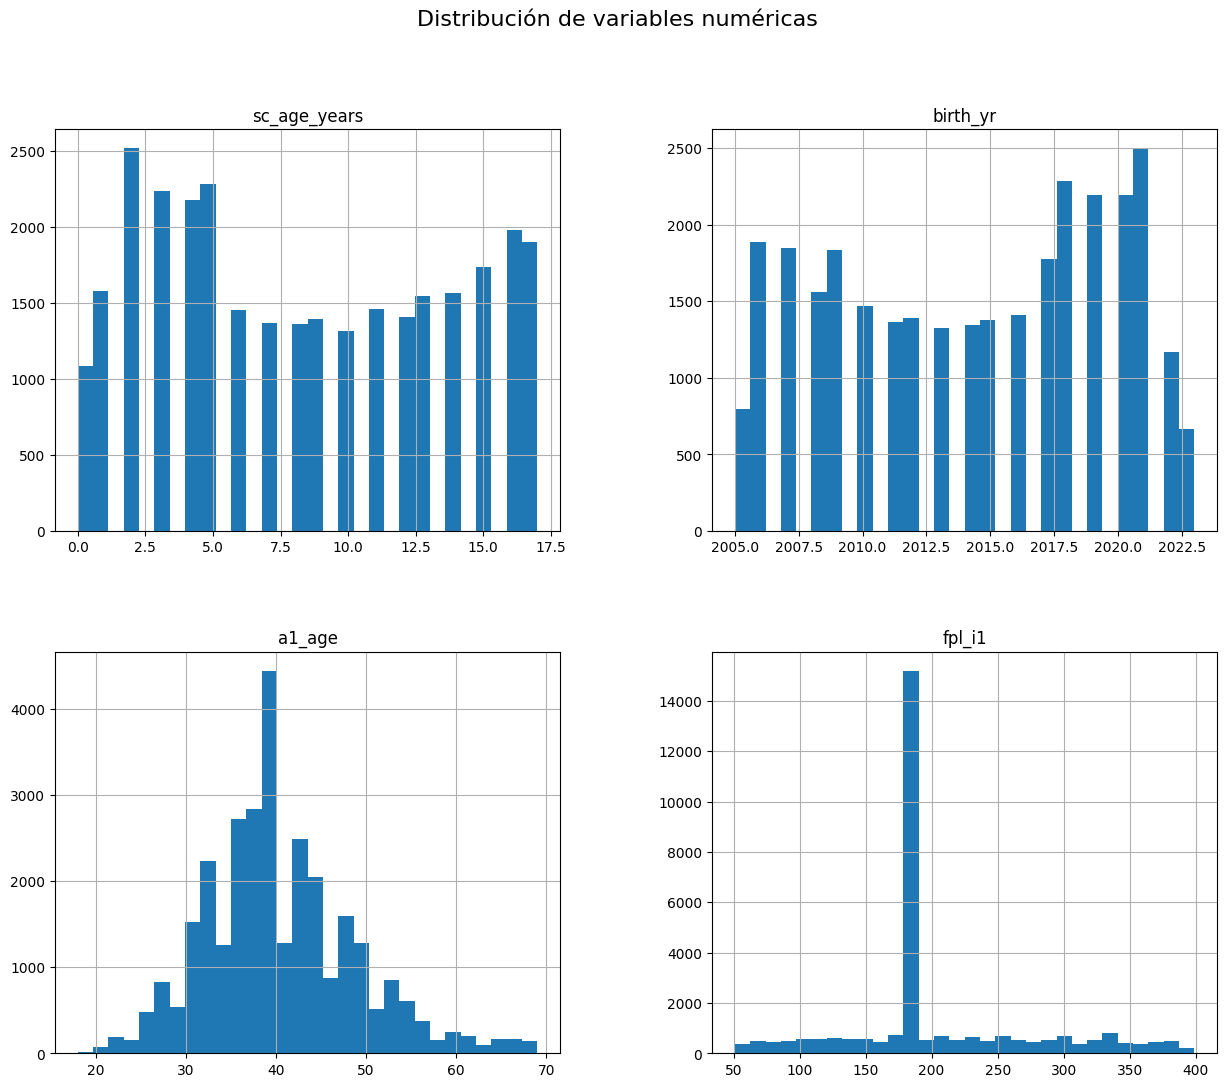

In [ ]:
import matplotlib.pyplot as plt

train_df.select_dtypes(include=["number"]).hist(figsize=(15, 12), bins=30)
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

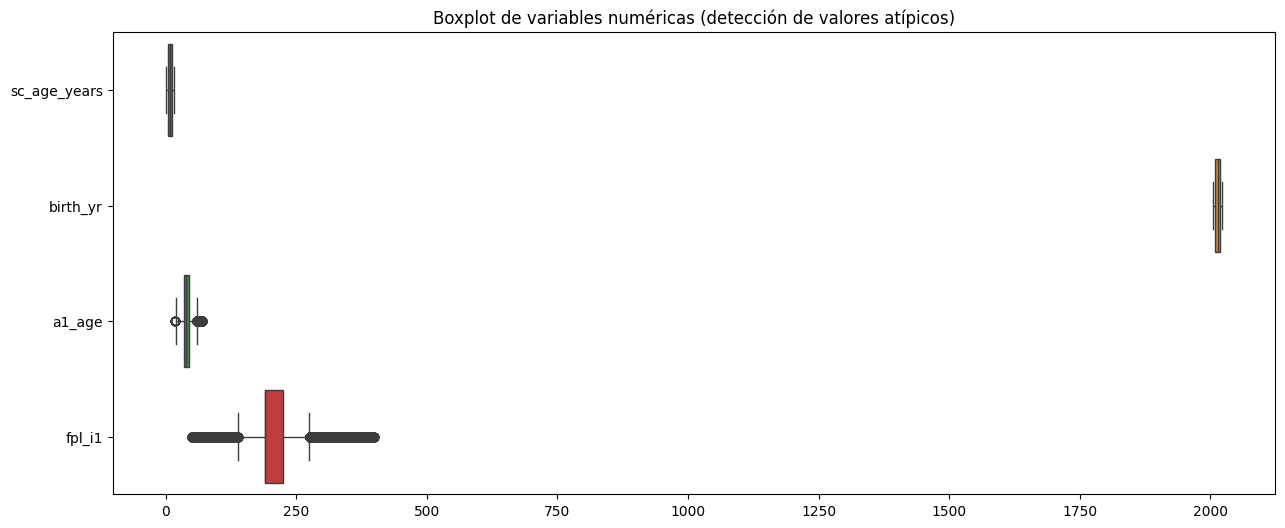

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(data=train_df.select_dtypes(include=["number"]), orient="h")
plt.title("Boxplot de variables numéricas (detección de valores atípicos)")
plt.show()

# Estudio de Outliers

In [ ]:
Q1 = train_df['a1_age'].quantile(0.25)
Q3 = train_df['a1_age'].quantile(0.75)
IQR = Q3 - Q1

# Limites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = train_df[(train_df['a1_age'] < lower_bound) | (train_df['a1_age'] > upper_bound)]

In [ ]:
print(outliers[['a1_age']])


       a1_age
100        68
267        63
273        64
309        66
345        64
...       ...
43980      66
44040      62
44042      19
44050      64
44051      66

[781 rows x 1 columns]


In [ ]:
Q1 = train_df['a1_age'].quantile(0.25)
Q3 = train_df['a1_age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Valores aceptables: {lower_bound:.2f} a {upper_bound:.2f}")


Q1: 35.0, Q3: 45.0, IQR: 10.0
Valores aceptables: 20.00 a 60.00


In [ ]:
outliers = train_df[(train_df['a1_age'] < lower_bound) | (train_df['a1_age'] > upper_bound)]
print(f"Número de outliers: {outliers.shape[0]}")


Número de outliers: 781


In [ ]:
import numpy as np
train_df['fpl_i1_log'] = np.log1p(train_df['fpl_i1'])


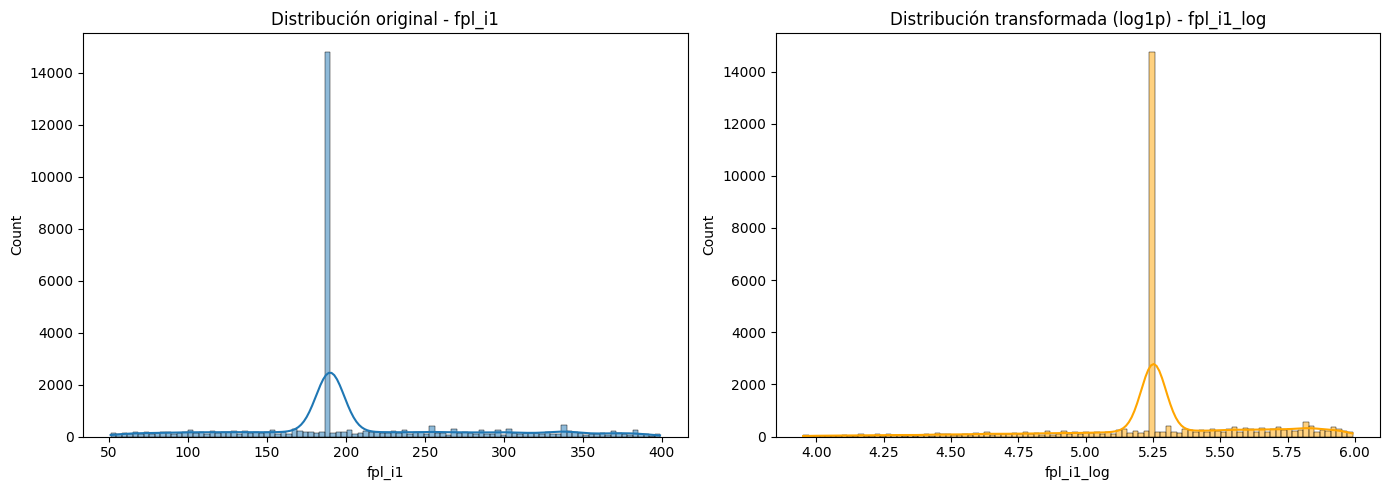

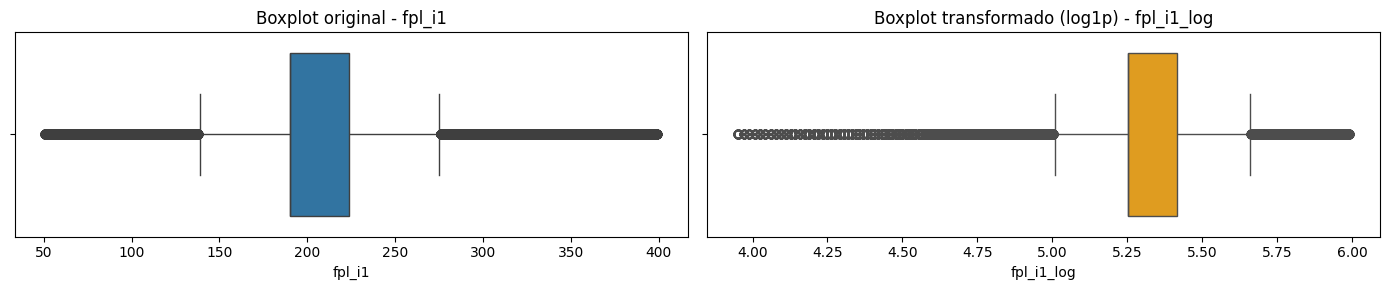

In [ ]:
# 🎨 2. Comparar histogramas (distribución)
plt.figure(figsize=(14, 5))

# Original
plt.subplot(1, 2, 1)
sns.histplot(train_df['fpl_i1'], bins=100, kde=True)
plt.title('Distribución original - fpl_i1')

# Transformada
plt.subplot(1, 2, 2)
sns.histplot(train_df['fpl_i1_log'], bins=100, kde=True, color='orange')
plt.title('Distribución transformada (log1p) - fpl_i1_log')

plt.tight_layout()
plt.show()

# 📦 3. Comparar boxplots
plt.figure(figsize=(14, 3))

# Original
plt.subplot(1, 2, 1)
sns.boxplot(x=train_df['fpl_i1'])
plt.title('Boxplot original - fpl_i1')

# Transformada
plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['fpl_i1_log'], color='orange')
plt.title('Boxplot transformado (log1p) - fpl_i1_log')

plt.tight_layout()
plt.show()

In [ ]:
train_df['fpl_group'] = pd.cut(train_df['fpl_i1'],
                         bins=[0, 100, 200, 300, np.inf],
                         labels=['Pobreza severa', 'Pobreza moderada', 'Ingreso medio-bajo', 'Ingreso alto'])

In [ ]:
# Variables Categóricas
categoricas = [
    "hhlanguage", "sc_sex", "a1_marital", "a1_relation", "k3q04_r",
    "grades", "sc_racer", "family_r", "birthwt", "birth_yr_f", "fpl_group"
]

# Variables Binarias
binarias = [
    "memorycond", "allergies", "k2q40a", "autoimmune", "headache", "k2q33a",
    "k2q33b", "k2q32a", "k2q32b", "k2q34a", "k2q34b", "k2q31a", "k2q31b",
    "k2q31d", "addtreat", "concussion", "confirminjury", "k4q23", "k6q15",
    "sescurrsvc", "ace9", "a1_born", "sc_k2q22", "birthwt_l"
]

# Variables Numéricas
numericas = [
    "sc_age_years", "a1_age", "fpl_i1", "birth_yr"
]

# Variables Ordinales (Texto)
ordinales = [
    "cerpals_desc", "k2q34c", "k2q31c", "a1_grade", "a1_menthealth", "k6q73_r",
    "k6q71_r", "k7q84_r", "k7q85_r", "k7q82_r", "k7q83_r", "k7q70_r", "bullied_r",
    "focuson", "nameemotions", "temper_r", "calmdown_r", "waitforturn", "hardwork",
    "sharetoys", "talkabout", "wktosolve", "k8q31", "makefriend", "sc_english",
    "higrade", "k8q32", "k8q34", "k7q04r_r", "outdoorswkday", "outdoorswkend",
    "screentime", "hcability", "k8q21", "k8q30", "k7q33", "bedtime", "agepos4",
    "a1_physhealth", "a1_menthealth", "ansiedad_status", "depresion_status",
    "conducta_status", "adhd_status", "adhd_medicated", "educacion_especial_status"
    "sc_english_clean","outdoorswkend_clean","cerpals_desc_clean","outdoorswkday_clean","sharetoys_clean","hardwork_clean","waitforturn_clean"
    ,"calmdown_r_clean","temper_r_clean","nameemotions_clean","focuson_clean","confirminjury_clean"
]

# Variables Temporales
temporales = [
    "birth_yr"
]


<ipython-input-24-1365126687>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fpl_counts.index, y=fpl_counts.values, palette='Set2')


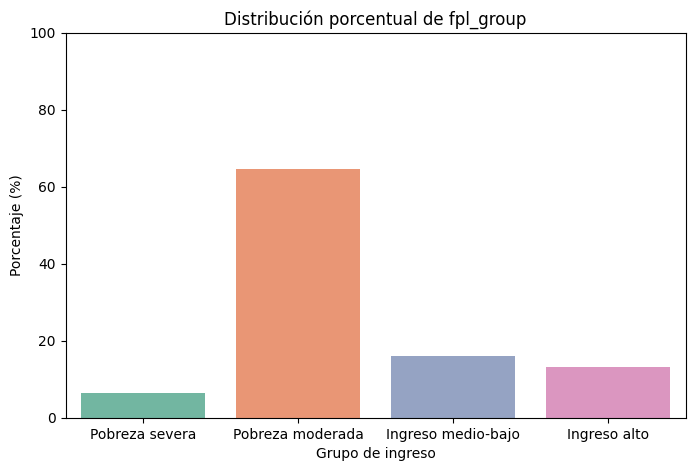

In [ ]:
# Calcular proporciones
fpl_counts = train_df['fpl_group'].value_counts(normalize=True).sort_index() * 100

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=fpl_counts.index, y=fpl_counts.values, palette='Set2')

plt.title('Distribución porcentual de fpl_group')
plt.xlabel('Grupo de ingreso')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)
plt.show()


# Variables Categóricas

📊 Número de valores únicos por variable categórica:
 family_r       8
a1_relation    6
a1_marital     6
grades         6
birth_yr_f     4
fpl_group      4
hhlanguage     3
sc_racer       3
k3q04_r        3
birthwt        3
sc_sex         2
dtype: int64


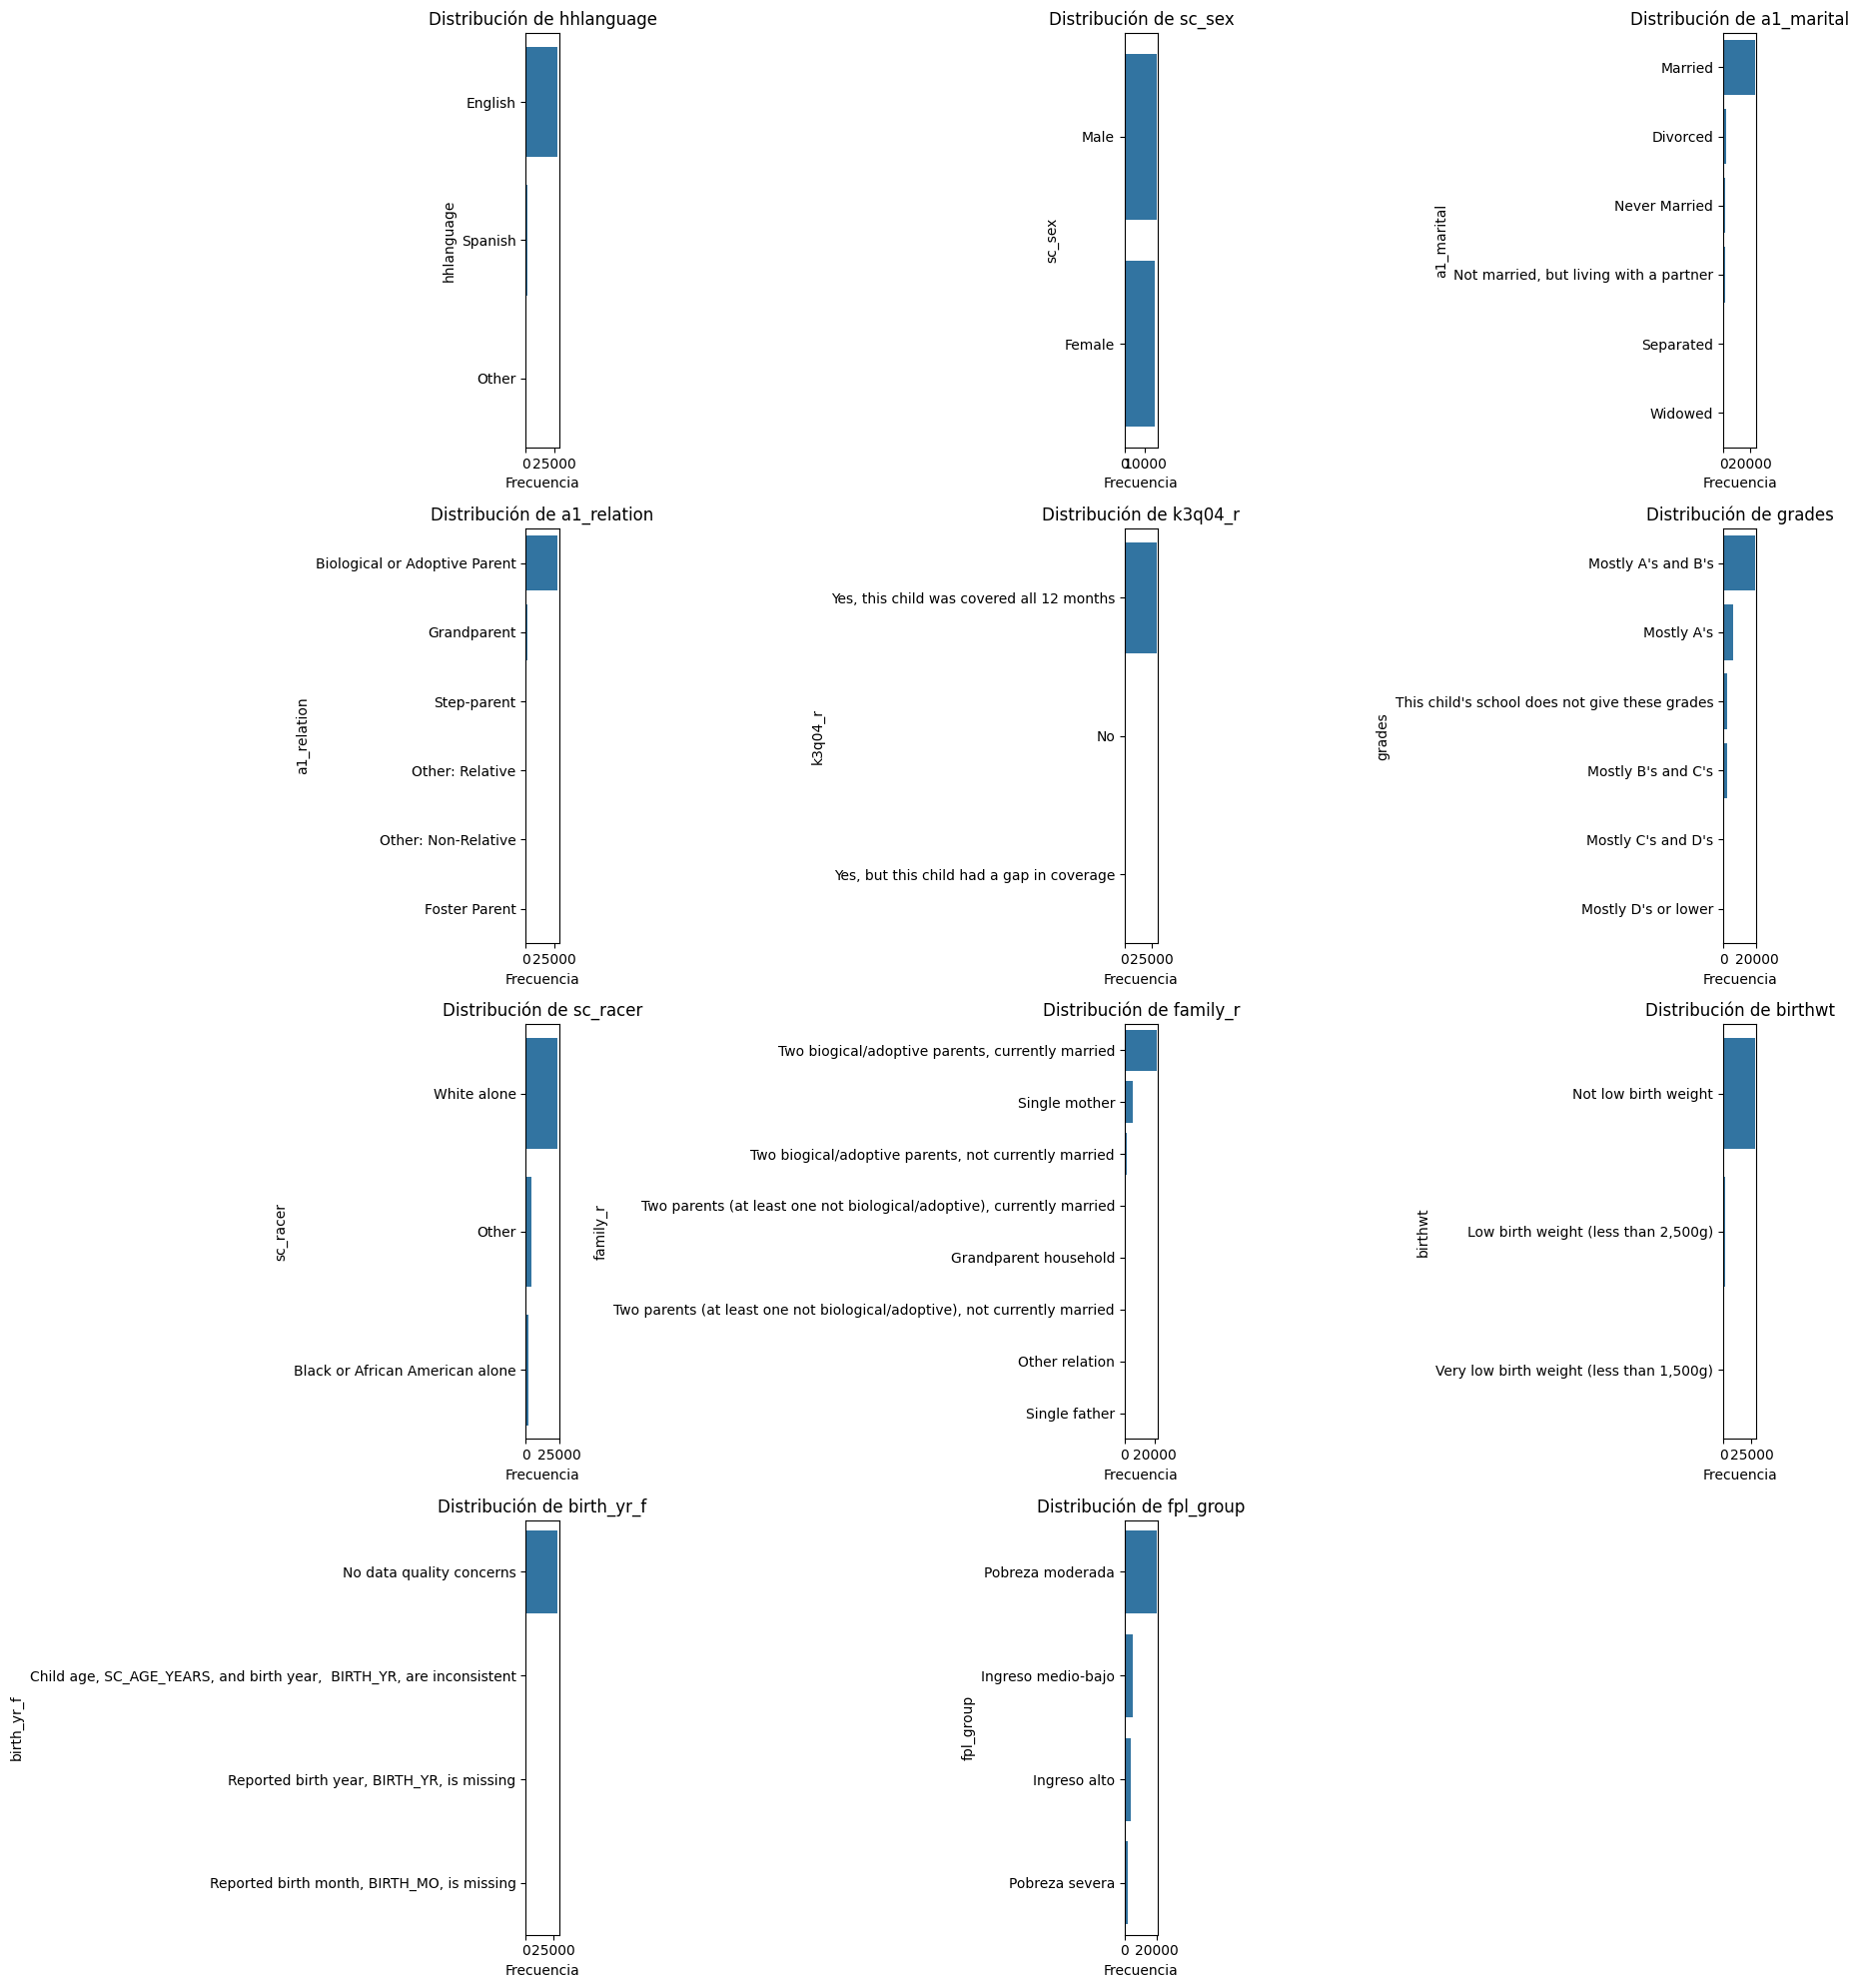

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analizar valores únicos en variables categóricas
valores_unicos = train_df[categoricas].nunique().sort_values(ascending=False)
print("📊 Número de valores únicos por variable categórica:\n", valores_unicos)

# Configurar gráficos de barras para analizar distribución
num_cols = 3  # Número de columnas en la visualización
num_rows = (len(categoricas) + num_cols - 1) // num_cols  # Calcular número de filas

plt.figure(figsize=(18, num_rows * 5))  # Ajustar tamaño de la figura
for i, col in enumerate(categoricas):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(y=train_df[col], order=train_df[col].value_counts().index[:10])  # Top 10 valores más comunes
    plt.title(f"Distribución de {col}")
    plt.xlabel("Frecuencia")
    plt.ylabel(col)

plt.tight_layout(rect=[0, 0, 1, 1])  # Ajuste de márgenes para evitar superposición
plt.show()


In [ ]:
# Eliminamos birth_yr_f --> Variable poco significativa
df = train_df.drop(columns=["birth_yr_f"])

# **Variables ordinales**

In [ ]:
df_original = df.copy()

In [ ]:
def columnas_con_logical_skip(df):
    columnas = []
    for col in df.columns:
        if df[col].astype(str).str.contains("Logical skip").any():
            columnas.append(col)
    return columnas

# Suponiendo que ya tienes tu DataFrame llamado df
cols_logical_skip = columnas_con_logical_skip(df)

print("Columnas con 'Logical skip':")
print(cols_logical_skip)

Columnas con 'Logical skip':
['k2q33b', 'k2q32b', 'k2q34b', 'k2q31b', 'k2q31d', 'addtreat', 'confirminjury', 'sescurrsvc', 'cerpals_desc', 'k2q34c', 'k2q31c', 'focuson', 'nameemotions', 'temper_r', 'calmdown_r', 'waitforturn', 'hardwork', 'sharetoys', 'outdoorswkday', 'outdoorswkend', 'sc_english']


In [ ]:
def etiquetar_english(row):
    if row["sc_age_years"] < 4:
        return "Too young"
    elif row["sc_english"] == "Well":
        return "Well"
    elif row["sc_english"] == "Very well":
        return "Very Well"
    elif row["sc_english"] == "Not well":
        return "Not well"
    elif row["sc_english"] == "Not at all":
        return "Not at all"
    else:
        return np.nan

train_df["sc_english_clean"] = train_df.apply(etiquetar_english, axis=1)

In [ ]:
def reemplazar_logical_skip(train_df):
    # Creamos una copia de la columna original
    train_df["outdoorswkend_clean"] = train_df["outdoorswkend"].copy()

    # Condición: si el valor es 'Logical skip' y la edad es menor de 3 años
    condition = (train_df["outdoorswkend"] == "Logical skip") & (train_df["sc_age_years"] < 3)

    # Reemplazamos solo esos valores
    train_df.loc[condition, "outdoorswkend_clean"] = "Too young (<3 years)"

    return train_df

train_df = reemplazar_logical_skip(train_df)


In [ ]:
def transformar_cerpals(train_df):
    # Convertimos la severidad a números
    severidad_map = {
        "Mild": "Mild",
        "Moderate": "Moderate",
        "Severe": "Severe",
        "Logical skip": "No Paralisis Cerebral"
    }

    train_df["cerpals_desc_clean"] = train_df["cerpals_desc"].astype(str).map(severidad_map)
    return train_df

# Llamada a la función (fuera de la definición, sin espacios delante)
train_df = transformar_cerpals(train_df)

In [ ]:
def reemplazar_logical_skip(df):
    # Creamos una copia de la columna original
    df["outdoorswkday_clean"] = df["outdoorswkday"].copy()

    # Condición: si el valor es 'Logical skip' y la edad es menor de 3 años
    condition = (df["outdoorswkday"] == "Logical skip") & (df["sc_age_years"] < 3)

    # Reemplazamos solo esos valores
    df.loc[condition, "outdoorswkday_clean"] = "Too young (<3 years)"

    return df
train_df = reemplazar_logical_skip(train_df)

In [ ]:
def transformar_sharetoys(row):
    if row["sc_age_years"] < 3:
        return "Too young (<3 years)"
    elif row["sharetoys"] == "Always":
        return "Always"
    elif row["sharetoys"] == "Most of the time":
        return "Most of the time"
    elif row["sharetoys"] == "About half the time":
        return "About half the time"
    elif row["sharetoys"] == "Sometimes":
        return "Sometimes"
    elif row["sharetoys"] == "Never":
        return "Never"
    else:
        return np.nan

train_df["sharetoys_clean"] = train_df.apply(transformar_sharetoys, axis=1)

In [ ]:
def transformar_hardwork(row):
    if row["sc_age_years"] < 3:
        return "Too young (<3 years)"
    elif row["hardwork"] == "Always":
        return "Always"
    elif row["hardwork"] == "Most of the time":
        return "Most of the time"
    elif row["hardwork"] == "About half the time":
        return "About half the time"
    elif row["hardwork"] == "Sometimes":
        return "Sometimes"
    elif row["hardwork"] == "Never":
        return "Never"
    else:
        return np.nan

train_df["hardwork_clean"] = train_df.apply(transformar_hardwork, axis=1)

In [ ]:
def transformar_waitforturn(row):
    if row["sc_age_years"] < 3:
        return "Too young (<3 years)"
    elif row["waitforturn"] == "Always":
        return "Always"
    elif row["waitforturn"] == "Most of the time":
        return "Most of the time"
    elif row["waitforturn"] == "About half the time":
        return "About half the time"
    elif row["waitforturn"] == "Sometimes":
        return "Sometimes"
    elif row["waitforturn"] == "Never":
        return "Never"
    else:
        return np.nan

train_df["waitforturn_clean"] = train_df.apply(transformar_waitforturn, axis=1)

In [ ]:
def transformar_calmdown_r(row):
    if row["sc_age_years"] < 3:
        return "Too young (<3 years)"
    elif row["calmdown_r"] == "Always":
        return "Always"
    elif row["calmdown_r"] == "Most of the time":
        return "Most of the time"
    elif row["calmdown_r"] == "About half the time":
        return "About half the time"
    elif row["calmdown_r"] == "Sometimes":
        return "Sometimes"
    elif row["calmdown_r"] == "Never":
        return "Never"
    else:
        return np.nan

train_df["calmdown_r_clean"] = train_df.apply(transformar_calmdown_r, axis=1)

In [ ]:
def transformar_temper_r(row):
    if row["sc_age_years"] < 3:
        return "Too young (<3 years)"
    elif row["temper_r"] == "Always":
        return "Always"
    elif row["temper_r"] == "Most of the time":
        return "Most of the time"
    elif row["temper_r"] == "About half the time":
        return "About half the time"
    elif row["temper_r"] == "Sometimes":
        return "Sometimes"
    elif row["temper_r"] == "Never":
        return "Never"
    else:
        return np.nan

train_df["temper_r_clean"] = train_df.apply(transformar_temper_r, axis=1)

In [ ]:
def transformar_nameemotions(row):
    if row["sc_age_years"] < 3:
        return "Too young (<3 years)"
    elif row["nameemotions"] == "Always":
        return "Always"
    elif row["nameemotions"] == "Most of the time":
        return "Most of the time"
    elif row["nameemotions"] == "About half the time":
        return "About half the time"
    elif row["nameemotions"] == "Sometimes":
        return "Sometimes"
    elif row["nameemotions"] == "Never":
        return "Never"
    else:
        return np.nan

train_df["nameemotions_clean"] = train_df.apply(transformar_nameemotions, axis=1)

In [ ]:
def transformar_focuson(row):
    if row["sc_age_years"] < 3:
        return "Too young (<3 years)"
    elif row["focuson"] == "Always":
        return "Always"
    elif row["focuson"] == "Most of the time":
        return "Most of the time"
    elif row["focuson"] == "About half the time":
        return "About half the time"
    elif row["focuson"] == "Sometimes":
        return "Sometimes"
    elif row["focuson"] == "Never":
        return "Never"
    else:
        return np.nan

train_df["focuson_clean"] = train_df.apply(transformar_focuson, axis=1)

In [ ]:
def transformar_confirminjury(train_df):
    # Aseguramos que los valores estén como texto
    train_df["concussion"] = df["concussion"].astype(str).str.strip()
    train_df["confirminjury"] = df["confirminjury"].astype(str).str.strip()

    def clasificar(row):
        concussion = row["concussion"]
        confirm = row["confirminjury"]

        if concussion == "No":
            return "No concussion suspected"
        elif concussion == "Yes":
            if confirm == "Yes":
                return "Confirmed"
            elif confirm == "No":
                return "Not confirmed"
            elif confirm == "Logical skip":
                return "Did not seek medical care"
        return np.nan  # Por si hay datos faltantes o inconsistentes

    train_df["confirminjury_clean"] = train_df.apply(clasificar, axis=1)
    return train_df


In [ ]:
train_df = transformar_confirminjury(train_df)
train_df["confirminjury_clean"].value_counts(dropna=False)

,count
confirminjury_clean,
No concussion suspected,28796
Confirmed,1239
Did not seek medical care,178
Not confirmed,164


In [ ]:
def fusionar_add_treatment(train_df):
    train_df["k2q31a"] = train_df["k2q31a"].astype(str).str.strip()
    train_df["addtreat"] = train_df["addtreat"].astype(str).str.strip()

    def clasificar(row):
        diag = row["k2q31a"]
        treat = row["addtreat"]

        if diag == "No":
            return "No ADD/ADHD"
        elif diag == "Yes":
            if treat == "Yes":
                return "Treated"
            elif treat == "No":
                return "Not treated"
            elif treat == "Logical skip":
                return "No info"
        return np.nan

    train_df["addtreat_clean"] = train_df.apply(clasificar, axis=1)
    return train_df


In [ ]:
train_df = fusionar_add_treatment(train_df)
train_df["addtreat_clean"].value_counts(dropna=False)


,count
addtreat_clean,
No ADD/ADHD,26976
Not treated,1865
Treated,1523
No info,13


In [ ]:
ordinales = [
    'a1_grade', 'a1_menthealth', 'k6q73_r', 'k6q71_r', 'k7q84_r', 'k7q85_r',
    'k7q82_r', 'k7q83_r', 'k7q70_r', 'bullied_r', 'talkabout', 'wktosolve',
    'k8q31', 'makefriend', 'higrade', 'k8q32', 'k8q34', 'k7q04r_r', 'screentime',
    'hcability', 'k8q21', 'k8q30', 'k7q33', 'bedtime', 'agepos4', 'a1_physhealth',
    'a1_menthealth', 'ansiedad_status', 'depresion_status', 'conducta_status',
    'adhd_status', 'adhd_medicated', 'educacion_especial_status',
    'sc_english_clean', 'outdoorswkend_clean', 'cerpals_desc_clean',
    'outdoorswkday_clean', 'sharetoys_clean', 'hardwork_clean', 'waitforturn_clean',
    'calmdown_r_clean', 'temper_r_clean', 'nameemotions_clean', 'focuson_clean',
    'confirminjury_clean', 'addtreat_clean'
]

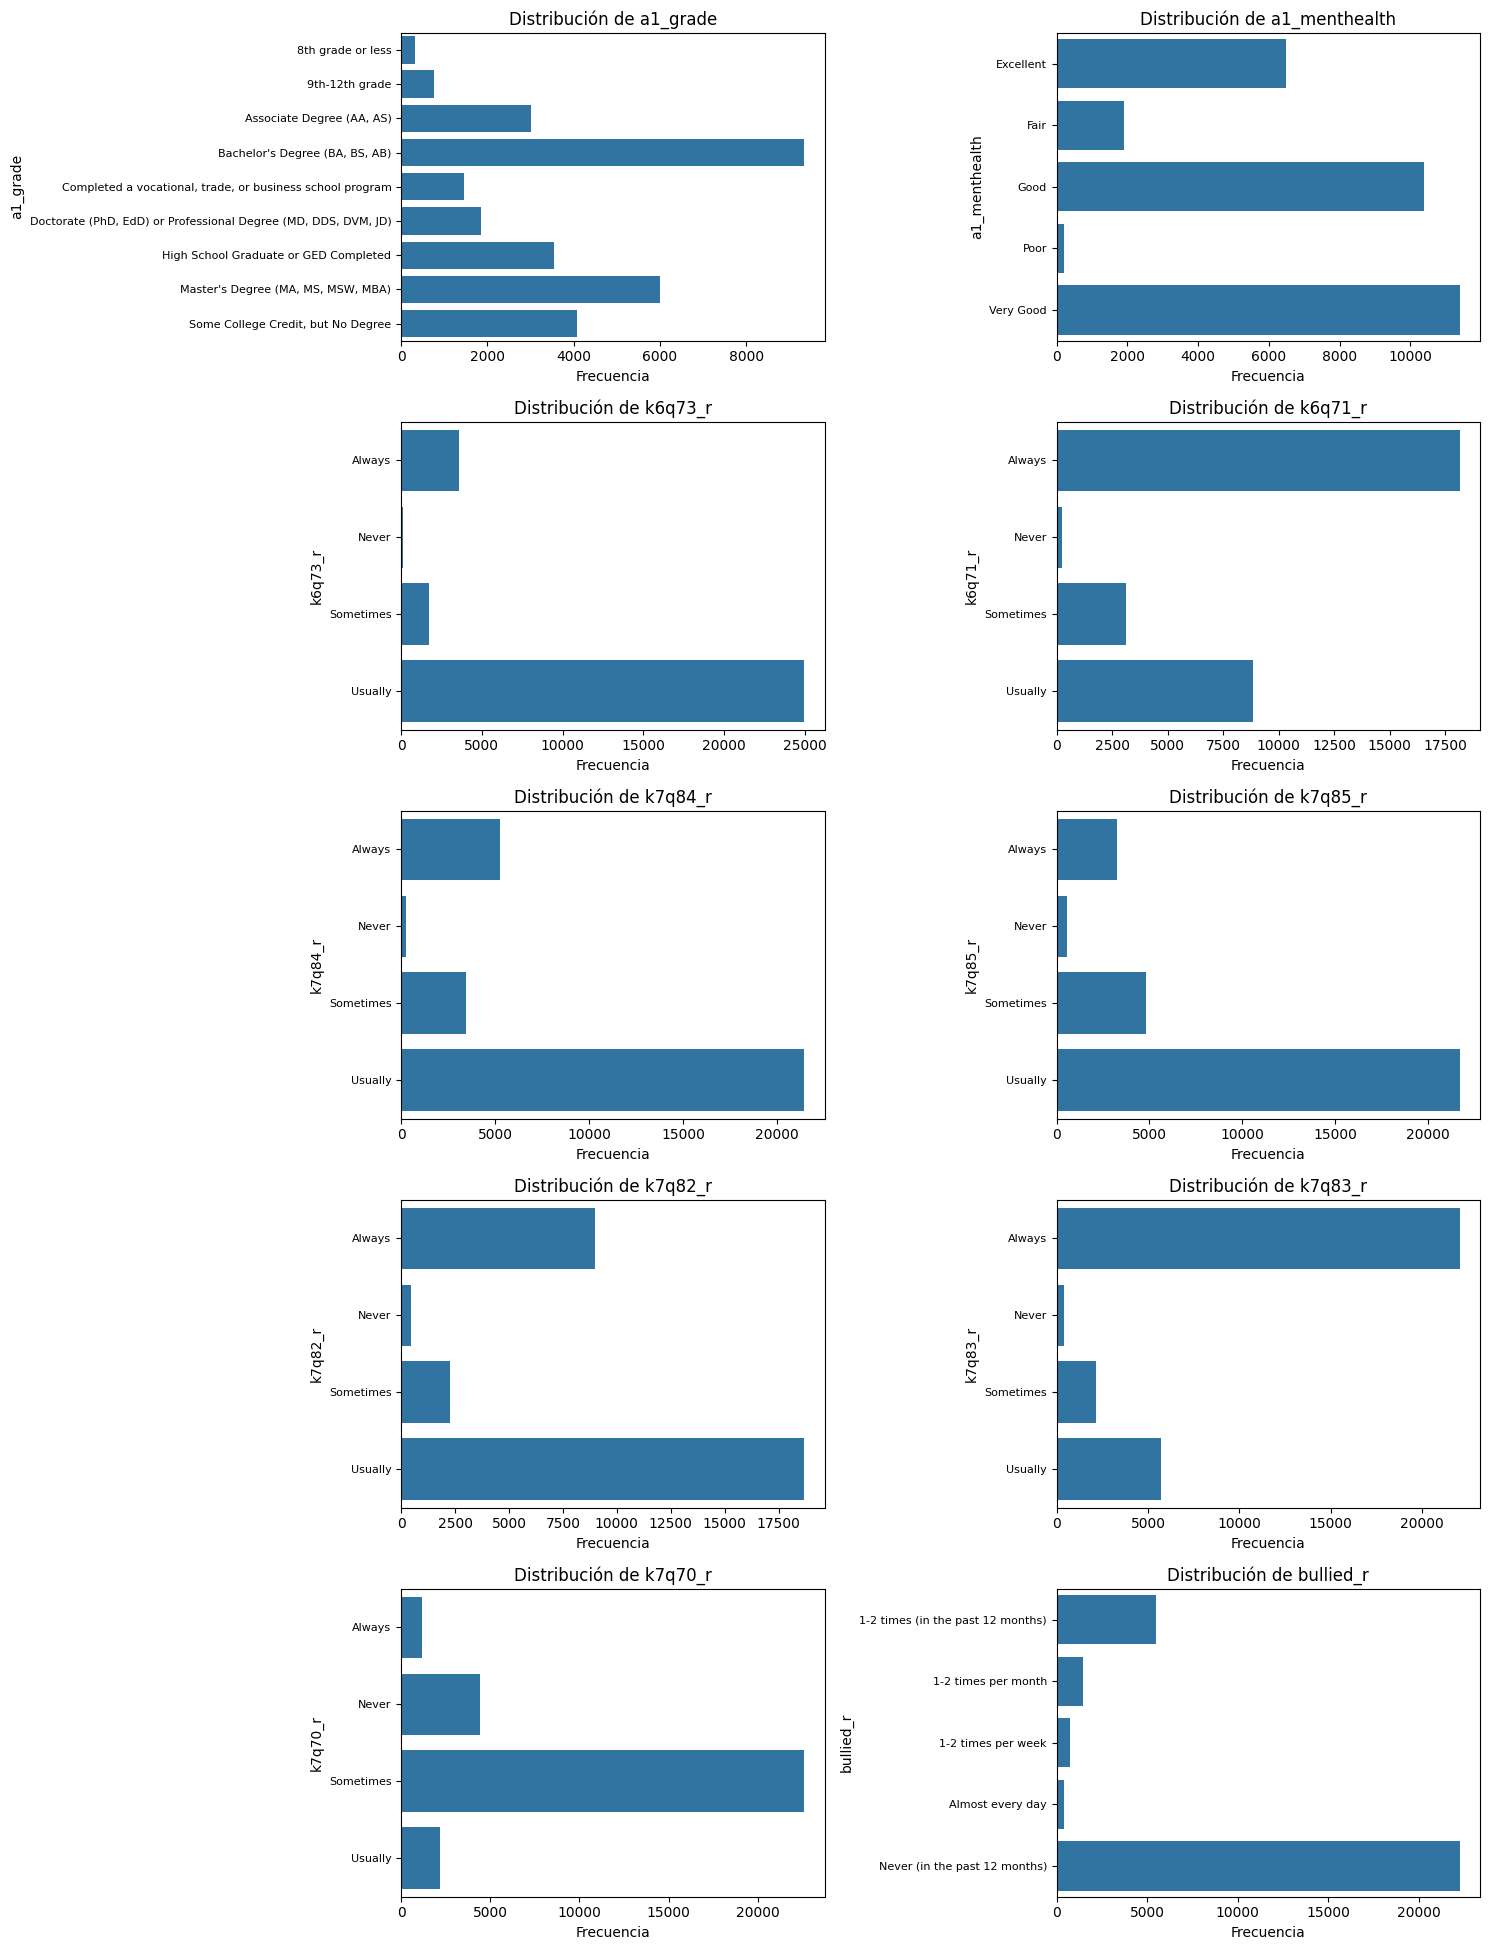

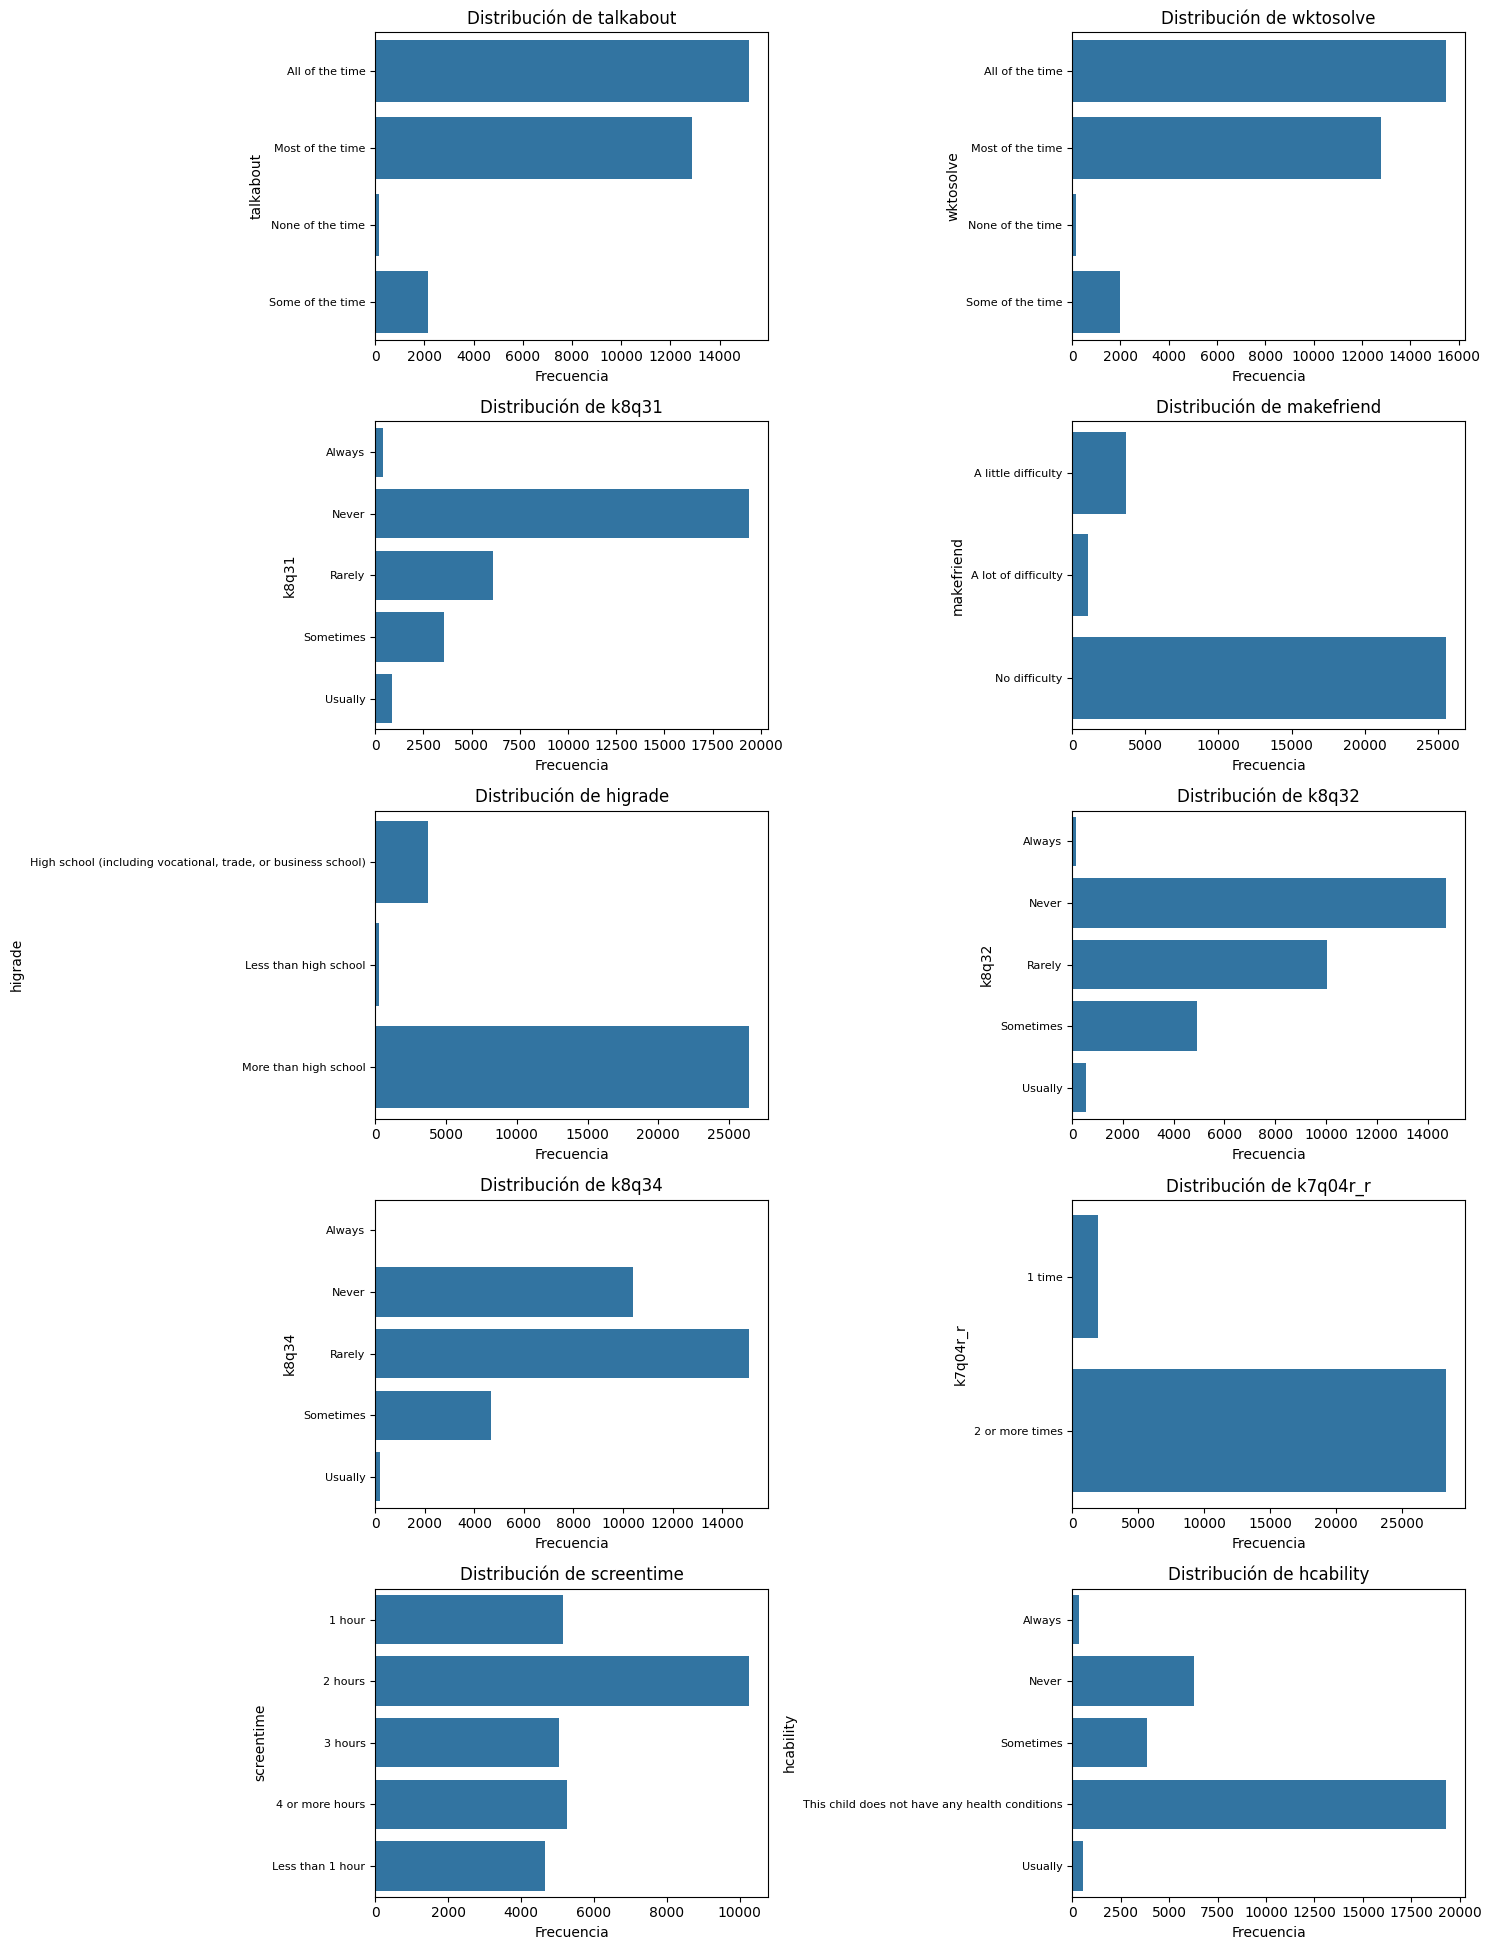

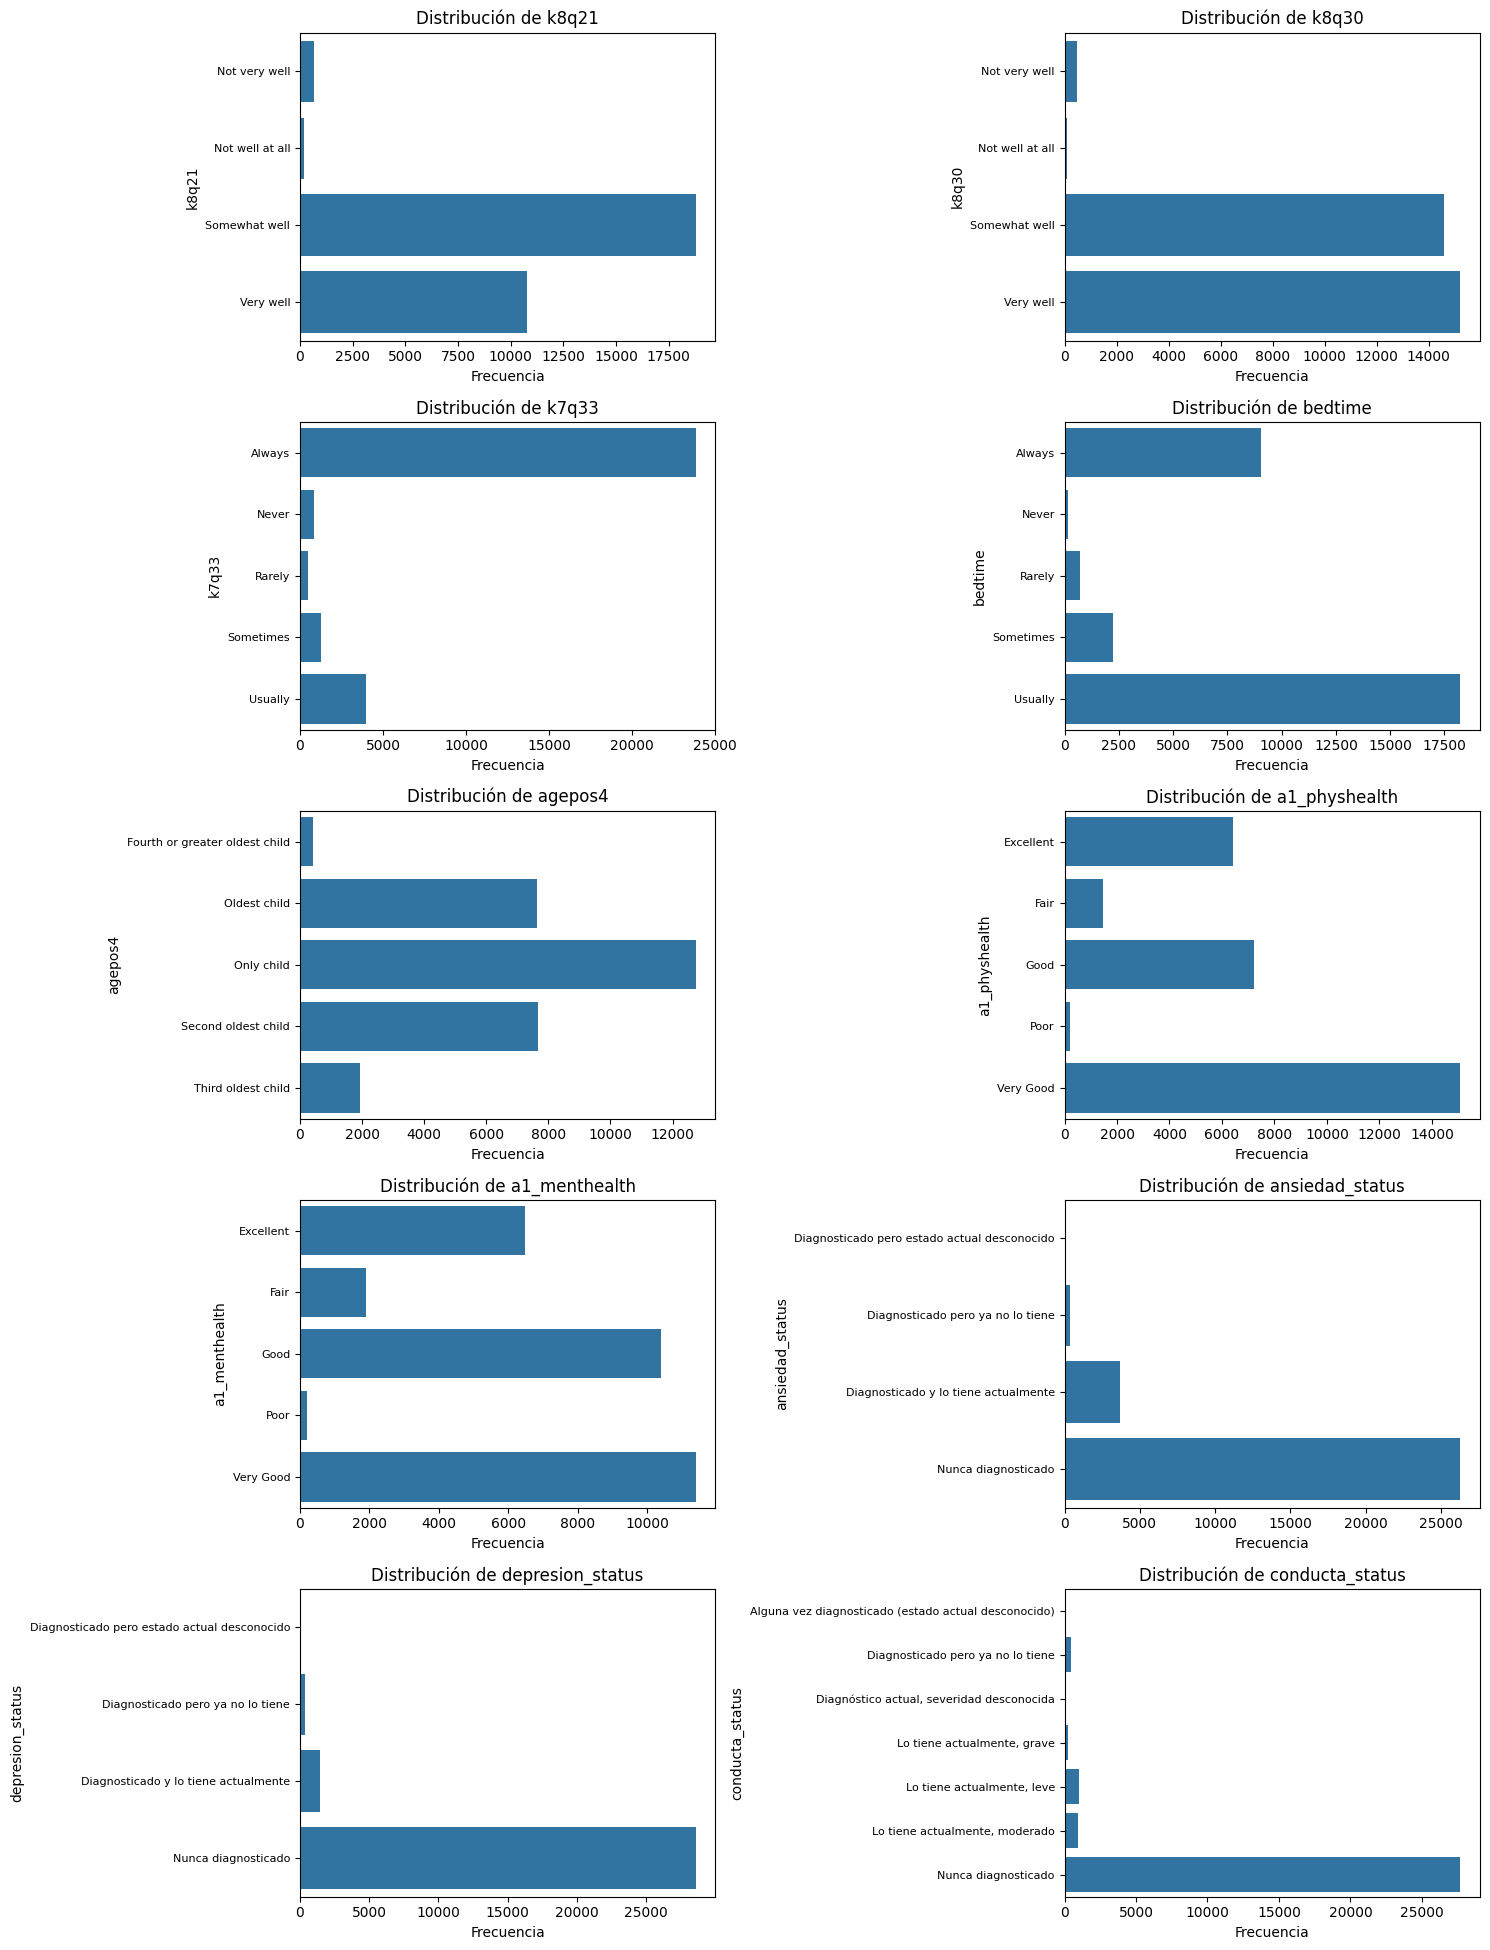

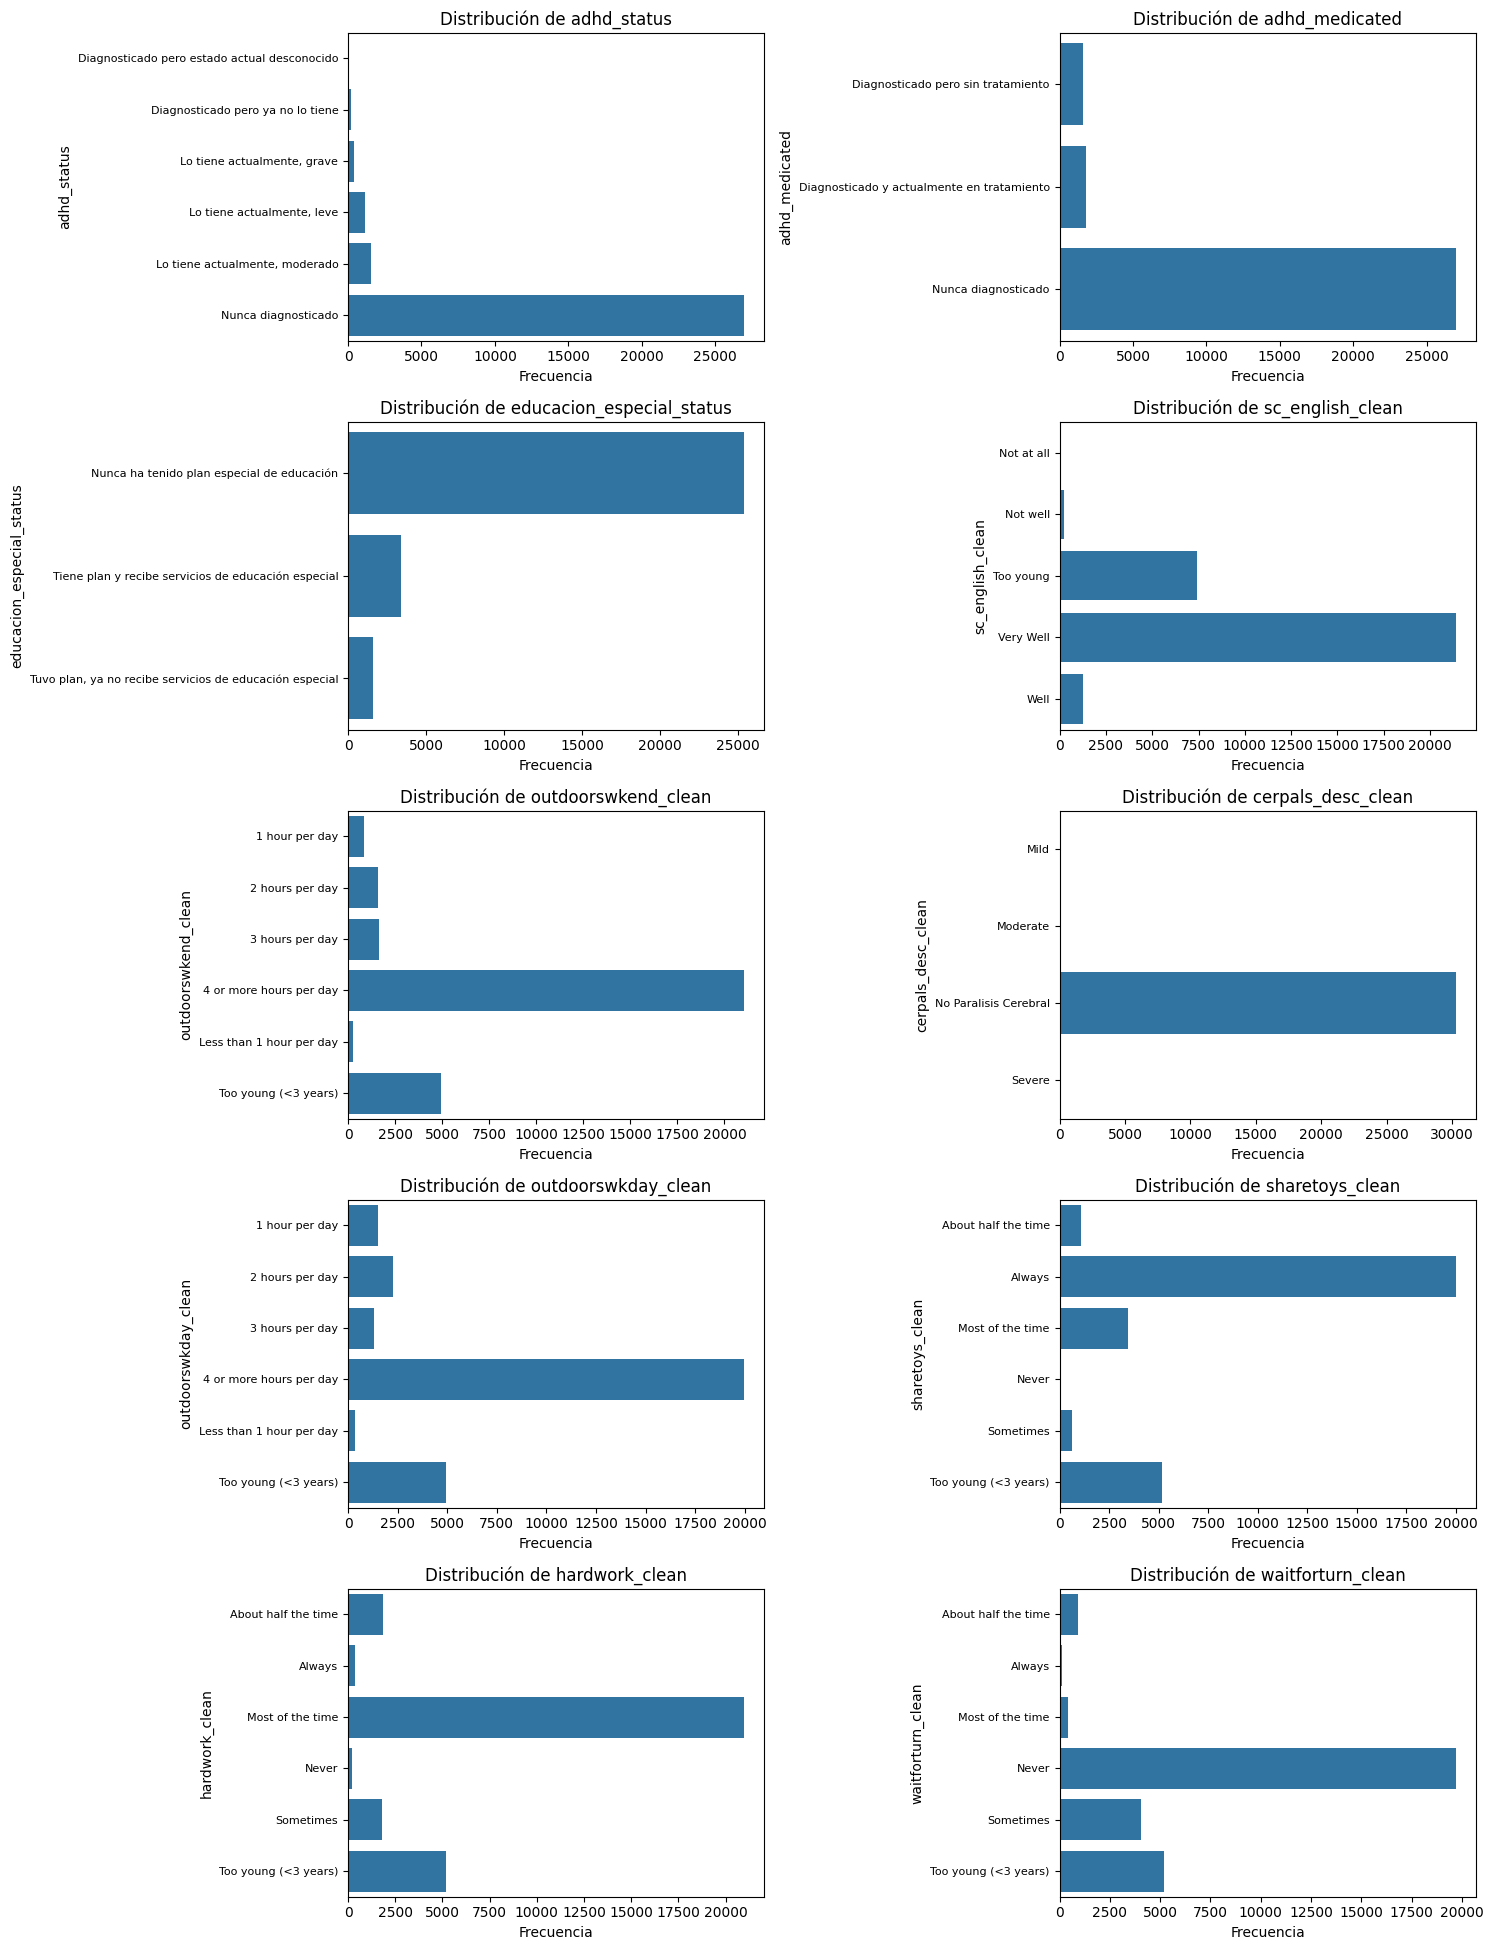

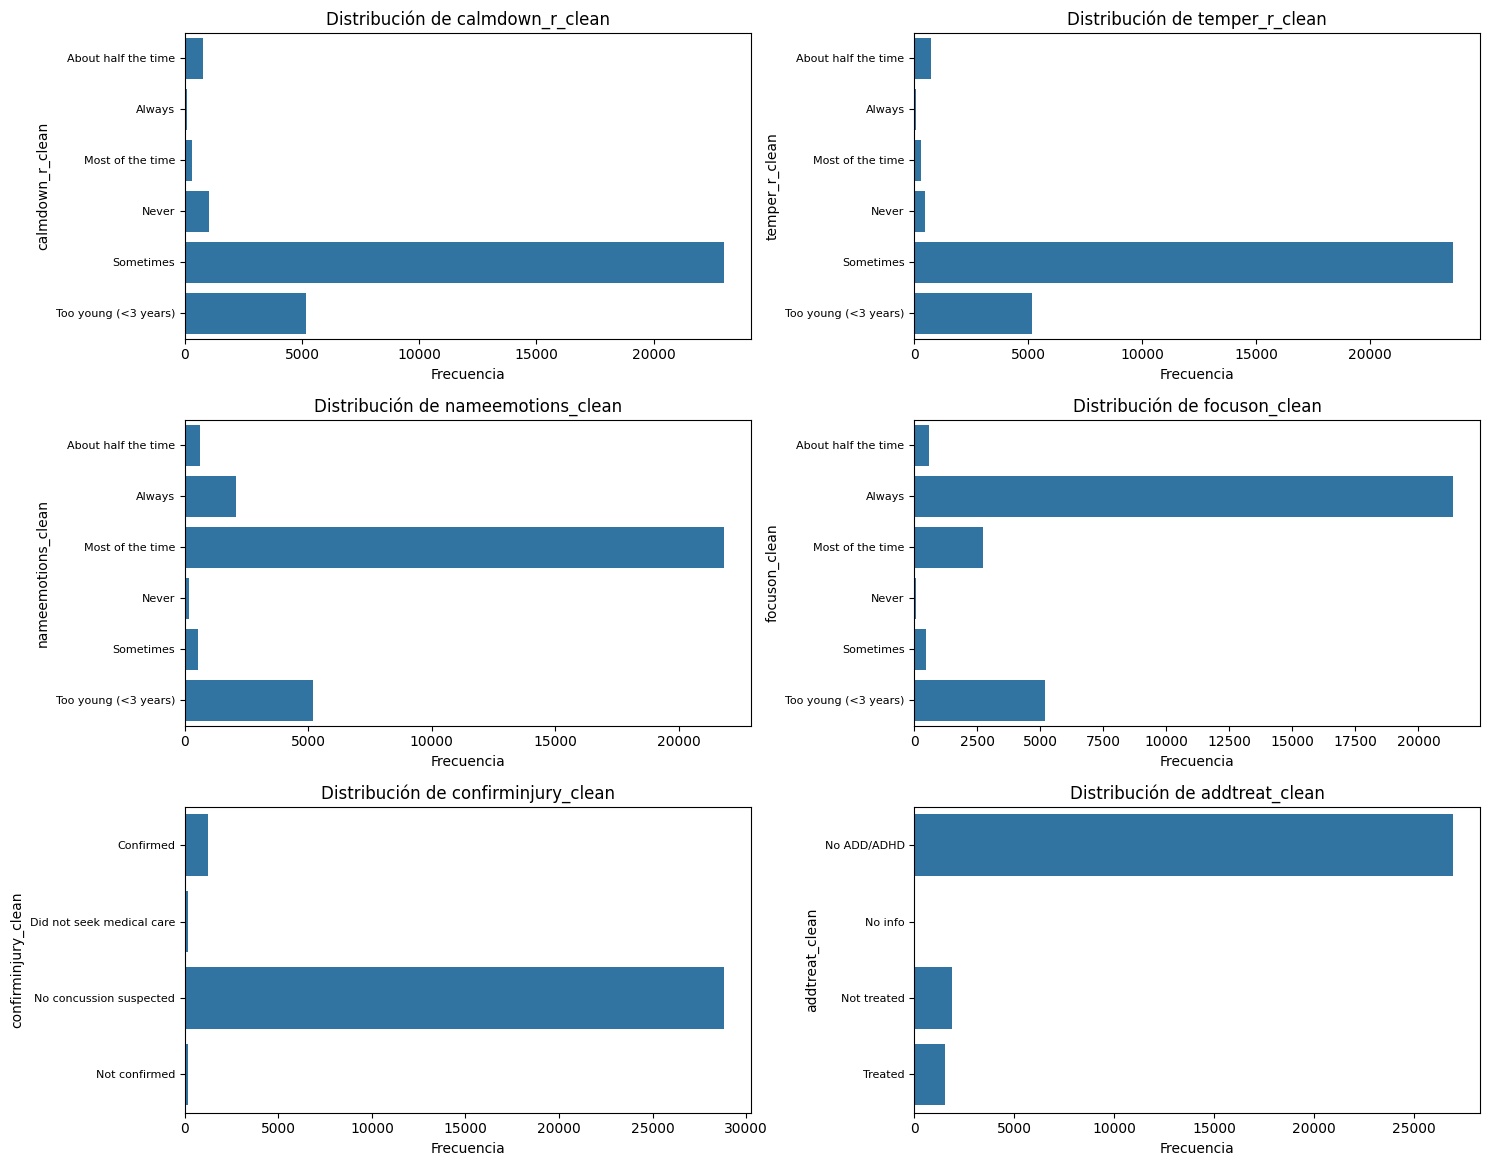

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_por_bloque = 10
num_bloques = (len(ordinales) + variables_por_bloque - 1) // variables_por_bloque

for bloque in range(num_bloques):
    inicio = bloque * variables_por_bloque
    fin = min((bloque + 1) * variables_por_bloque, len(ordinales))
    subset = ordinales[inicio:fin]

    num_cols = 2
    num_rows = (len(subset) + num_cols - 1) // num_cols

    plt.figure(figsize=(15, num_rows * 4))

    for i, col in enumerate(subset):
        if col in train_df.columns:
            plt.subplot(num_rows, num_cols, i + 1)
            orden = sorted(train_df[col].dropna().unique(), key=str)
            sns.countplot(y=train_df[col], order=orden)
            plt.title(f"Distribución de {col}")
            plt.xlabel("Frecuencia")
            plt.ylabel(col)
            plt.xticks(fontsize=10)
            plt.yticks(fontsize=8)

    plt.tight_layout(rect=[0, 0, 1, 0.98])

    # 🔥 Guardamos con nombre dinámico
    #nombre_archivo = f"distribuciones_ordinales_bloque{bloque+1}.png"
    #plt.savefig(nombre_archivo, dpi=300, bbox_inches="tight")
    #print(f"✅ Guardado: {nombre_archivo}")

    plt.show()


In [ ]:
train_df["sc_english_clean"].unique()

array(['Very Well', 'Well', 'Too young', 'Not well', 'Not at all'],
      dtype=object)

In [ ]:
#from google.colab import files
#files.download("distribuciones_ordinales_bloque1.png")

In [ ]:
#files.download("distribuciones_ordinales_bloque2.png")
#files.download("distribuciones_ordinales_bloque3.png")
#files.download("distribuciones_ordinales_bloque4.png")

In [ ]:
#files.download("distribuciones_ordinales_bloque5.png")

# Variables Binarias

In [ ]:
df = df.drop(columns=["k2q32a", "k2q32b"])


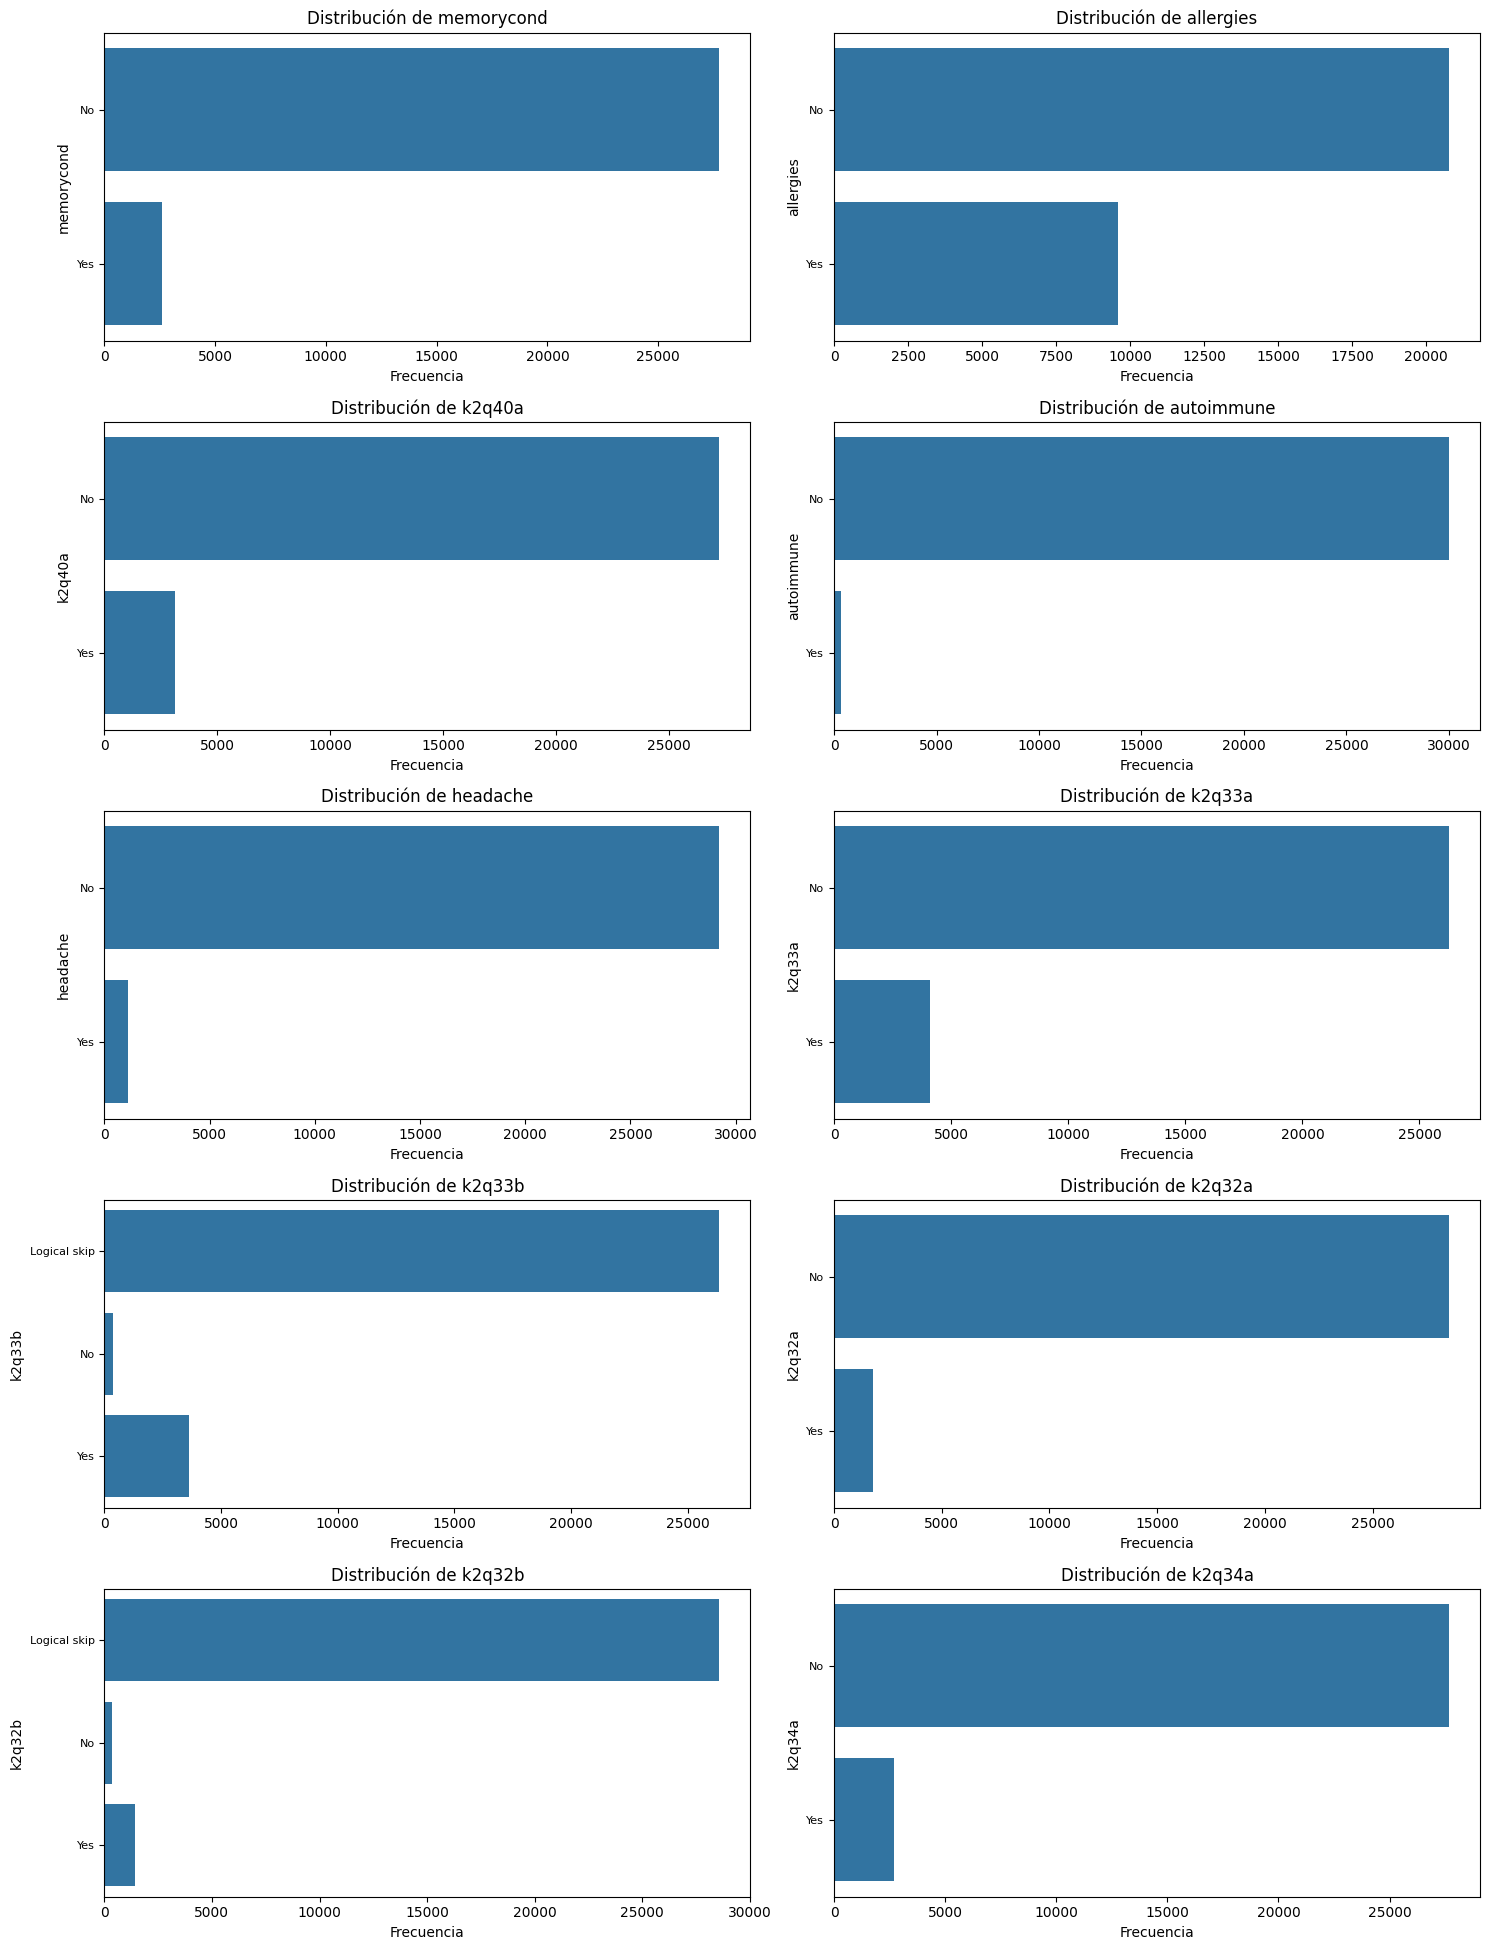

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = 2  # Número de columnas en la visualización
num_rows = (len(binarias[:10]) + num_cols - 1) // num_cols  # Calcular filas dinámicamente

plt.figure(figsize=(15, num_rows * 4))  # Aumentar el tamaño para evitar solapamiento
for i, col in enumerate(binarias[:10]):  # Ahora visualizamos 10 variables para mejor distribución
    plt.subplot(num_rows, num_cols, i + 1)

    # Ordenar categorías de menor a mayor (si es posible)
    orden = sorted(train_df[col].dropna().unique(), key=str)  # Orden alfabético si no son numéricos
    sns.countplot(y=train_df[col], order=orden)

    plt.title(f"Distribución de {col}")
    plt.xlabel("Frecuencia")
    plt.ylabel(col)
    plt.xticks(fontsize=10)  # Reducir tamaño de etiquetas
    plt.yticks(fontsize=8)   # Reducir tamaño de etiquetas para que no se solapen

plt.tight_layout(rect=[0, 0, 1, 0.98])  # Ajustar márgenes para evitar solapamientos
plt.show()


# Análisis de correlaciones


**Correlaciones variables numéricas - variable objetivo**




In [ ]:
train_df['k2q31a'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
train_df["k2q31a_bin"] = train_df["k2q31a"].map({"Yes": 1, "No": 0})


In [ ]:
numericas = [
    "sc_age_years", "a1_age", "birth_yr"
]

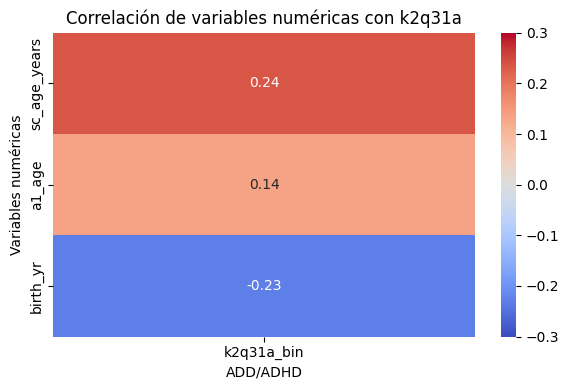

In [ ]:
df_corr = train_df[numericas + ["k2q31a_bin"]].apply(pd.to_numeric, errors="coerce")
matriz_correlacion = df_corr.corr()
correlaciones = matriz_correlacion[["k2q31a_bin"]].drop(index="k2q31a_bin").sort_values(by="k2q31a_bin", ascending=False)

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-0.3, vmax=0.3)
plt.title("Correlación de variables numéricas con k2q31a")
plt.xlabel("ADD/ADHD")
plt.ylabel("Variables numéricas")
plt.tight_layout()
plt.show()


In [ ]:
print(train_df["k2q31a"].value_counts())


k2q31a
No     26976
Yes     3401
Name: count, dtype: int64


**Calculo de p-value**

In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# Variables numéricas y objetivo
numericas = ["sc_age_years", "a1_age", "birth_yr"]
objetivo = "k2q31a_bin"

# Lista para guardar resultados
resultados = []

# Calcular coeficiente y p-valor para cada variable
for var in numericas:
    df_filtrado = df_corr[[var, objetivo]].dropna()
    r, p = pearsonr(df_filtrado[var], df_filtrado[objetivo])
    resultados.append((var, r, p))

# Crear DataFrame con resultados
tabla_correlacion = pd.DataFrame(resultados, columns=["Variable", "Coef. Pearson", "p-valor"])
tabla_correlacion["Significativo (p < 0.05)"] = tabla_correlacion["p-valor"] < 0.05

# Ordenar por correlación
tabla_correlacion.sort_values(by="Coef. Pearson", ascending=False, inplace=True)
tabla_correlacion.reset_index(drop=True, inplace=True)

# Mostrar
tabla_correlacion


,Variable,Coef. Pearson,p-valor,Significativo (p < 0.05)
0,sc_age_years,0.235689,0.000000e+00,True
1,a1_age,0.135593,1.350952e-124,True
2,birth_yr,-0.228108,0.000000e+00,True


**Correlaciones variables ordinales - variable objetivo**

In [ ]:
ordinales = [
    'a1_grade', 'a1_menthealth', 'k6q73_r', 'k6q71_r', 'k7q84_r', 'k7q85_r',
    'k7q82_r', 'k7q83_r', 'k7q70_r', 'bullied_r', 'talkabout', 'wktosolve',
    'k8q31', 'makefriend', 'higrade', 'k8q32', 'k8q34', 'k7q04r_r', 'screentime',
    'hcability', 'k8q21', 'k8q30', 'k7q33', 'bedtime', 'agepos4', 'a1_physhealth',
    'a1_menthealth', 'ansiedad_status', 'depresion_status', 'conducta_status',
    'adhd_status', 'adhd_medicated', 'educacion_especial_status',
    'sc_english_clean', 'outdoorswkend_clean', 'cerpals_desc_clean',
    'outdoorswkday_clean', 'sharetoys_clean', 'hardwork_clean', 'waitforturn_clean',
    'calmdown_r_clean', 'temper_r_clean', 'nameemotions_clean', 'focuson_clean',
    'confirminjury_clean', 'addtreat_clean'
]

In [ ]:
for col in ordinales:
    if col in train_df.columns:
        print(f"\n📌 Variable: {col}")
        print(f"Tipo de dato: {train_df[col].dtype}")
        print(f"Valores únicos ({train_df[col].nunique(dropna=False)}):")
        print(train_df[col].unique())
    else:
        print(f"\n⚠️ La variable '{col}' no está en el DataFrame.")



📌 Variable: a1_grade
Tipo de dato: object
Valores únicos (9):
['High School Graduate or GED Completed' 'Associate Degree (AA, AS)'
 'Completed a vocational, trade, or business school program'
 "Bachelor's Degree (BA, BS, AB)" 'Some College Credit, but No Degree'
 "Master's Degree (MA, MS, MSW, MBA)" '9th-12th grade'
 'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, JD)'
 '8th grade or less']

📌 Variable: a1_menthealth
Tipo de dato: object
Valores únicos (5):
['Very Good' 'Fair' 'Poor' 'Good' 'Excellent']

📌 Variable: k6q73_r
Tipo de dato: object
Valores únicos (4):
['Usually' 'Sometimes' 'Always' 'Never']

📌 Variable: k6q71_r
Tipo de dato: object
Valores únicos (4):
['Always' 'Sometimes' 'Usually' 'Never']

📌 Variable: k7q84_r
Tipo de dato: object
Valores únicos (4):
['Usually' 'Sometimes' 'Always' 'Never']

📌 Variable: k7q85_r
Tipo de dato: object
Valores únicos (4):
['Usually' 'Sometimes' 'Never' 'Always']

📌 Variable: k7q82_r
Tipo de dato: object
Valores únicos (4):
['Us

In [ ]:
codificaciones_ordinales = {
    "a1_grade": {
        '8th grade or less': 0,
        '9th-12th grade': 1,
        'High School Graduate or GED Completed': 2,
        'Completed a vocational, trade, or business school program': 3,
        'Some College Credit, but No Degree': 4,
        'Associate Degree (AA, AS)': 5,
        "Bachelor's Degree (BA, BS, AB)": 6,
        "Master's Degree (MA, MS, MSW, MBA)": 7,
        'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, JD)': 8
    },
    "a1_menthealth": {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4},
    "k6q73_r": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "k6q71_r": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "k7q84_r": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "k7q85_r": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "k7q82_r": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "k7q83_r": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "k7q70_r": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "bullied_r": {
        'Never (in the past 12 months)': 0,
        '1-2 times (in the past 12 months)': 1,
        '1-2 times per month': 2,
        '1-2 times per week': 3,
        'Almost every day': 4
    },
    "talkabout": {'None of the time': 0, 'Some of the time': 1, 'Most of the time': 2, 'All of the time': 3},
    "wktosolve": {'None of the time': 0, 'Some of the time': 1, 'Most of the time': 2, 'All of the time': 3},
    "k8q31": {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Usually': 3, 'Always': 4},
    "makefriend": {'A lot of difficulty': 0, 'A little difficulty': 1, 'No difficulty': 2},
    "higrade": {
        'Less than high school': 0,
        'High school (including vocational, trade, or business school)': 1,
        'More than high school': 2
    },
    "k8q32": {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Usually': 3, 'Always': 4},
    "k8q34": {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Usually': 3, 'Always': 4},
    "k7q04r_r": {'1 time': 0, '2 or more times': 1},
    "screentime": {'Less than 1 hour': 0, '1 hour': 1, '2 hours': 2, '3 hours': 3, '4 or more hours': 4},
    "hcability": {
        'This child does not have any health conditions': 0,
        'Never': 1, 'Sometimes': 2, 'Usually': 3, 'Always': 4
    },
    "k8q21": {'Not well at all': 0, 'Not very well': 1, 'Somewhat well': 2, 'Very well': 3},
    "k8q30": {'Not well at all': 0, 'Not very well': 1, 'Somewhat well': 2, 'Very well': 3},
    "k7q33": {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Usually': 3, 'Always': 4},
    "bedtime": {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Usually': 3, 'Always': 4},
    "agepos4": {
        'Only child': 0, 'Oldest child': 1, 'Second oldest child': 2,
        'Third oldest child': 3, 'Fourth or greater oldest child': 4
    },
    "a1_physhealth": {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4},
    "a1_menthealth": {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4},
    "ansiedad_status": {
        "Nunca diagnosticado": 0,
        "Diagnosticado pero ya no lo tiene": 1,
        "Diagnosticado pero estado actual desconocido": 2,
        "Diagnosticado y lo tiene actualmente": 3
    },
    "depresion_status": {
        "Nunca diagnosticado": 0,
        "Diagnosticado pero ya no lo tiene": 1,
        "Diagnosticado pero estado actual desconocido": 2,
        "Diagnosticado y lo tiene actualmente": 3
    },
    "conducta_status": {
        "Nunca diagnosticado": 0,
        "Diagnosticado pero ya no lo tiene": 1,
        "Alguna vez diagnosticado (estado actual desconocido)": 2,
        "Lo tiene actualmente, leve": 3,
        "Lo tiene actualmente, moderado": 4,
        "Lo tiene actualmente, grave": 5,
        "Diagnóstico actual, severidad desconocida": 6
    },
    "adhd_status": {
        "Nunca diagnosticado": 0,
        "Diagnosticado pero ya no lo tiene": 1,
        "Diagnosticado pero estado actual desconocido": 2,
        "Lo tiene actualmente, leve": 3,
        "Lo tiene actualmente, moderado": 4,
        "Lo tiene actualmente, grave": 5
    },
    "adhd_medicated": {
        "Nunca diagnosticado": 0,
        "Diagnosticado pero sin tratamiento": 1,
        "Diagnosticado y actualmente en tratamiento": 2
    },
    "educacion_especial_status": {
        "Nunca ha tenido plan especial de educación": 0,
        "Tuvo plan, ya no recibe servicios de educación especial": 1,
        "Tiene plan y recibe servicios de educación especial": 2
    },
    "sc_english_clean": {
        "Not at all": 1, "Not well": 2, "Well": 3, "Very Well": 4, "Too young": 0
    },
    "outdoorswkend_clean": {
        "Too young (<3 years)": 0,
        "Less than 1 hour per day": 1,
        "1 hour per day": 2,
        "2 hours per day": 3,
        "3 hours per day": 4,
        "4 or more hours per day": 5
    },
    "cerpals_desc_clean": {
        "No Paralisis Cerebral": 0, "Mild": 1, "Moderate": 2, "Severe": 3
    },
    "outdoorswkday_clean": {
        "Too young (<3 years)": 0,
        "Less than 1 hour per day": 1,
        "1 hour per day": 2,
        "2 hours per day": 3,
        "3 hours per day": 4,
        "4 or more hours per day": 5
    },
    "sharetoys_clean": {
        "Too young (<3 years)": 0,
        "Never": 1,
        "About half the time": 2,
        "Sometimes": 3,
        "Most of the time": 4,
        "Always": 5
    },
    "hardwork_clean": {
        "Too young (<3 years)": 0,
        "Never": 1,
        "About half the time": 2,
        "Sometimes": 3,
        "Most of the time": 4,
        "Always": 5
    },
    "waitforturn_clean": {
        "Too young (<3 years)": 0,
        "Never": 1,
        "About half the time": 2,
        "Sometimes": 3,
        "Most of the time": 4,
        "Always": 5
    },
    "calmdown_r_clean": {
        "Too young (<3 years)": 0,
        "Never": 1,
        "About half the time": 2,
        "Sometimes": 3,
        "Most of the time": 4,
        "Always": 5
    },
    "temper_r_clean": {
        "Too young (<3 years)": 0,
        "Never": 1,
        "About half the time": 2,
        "Sometimes": 3,
        "Most of the time": 4,
        "Always": 5
    },
    "nameemotions_clean": {
        "Too young (<3 years)": 0,
        "Never": 1,
        "About half the time": 2,
        "Sometimes": 3,
        "Most of the time": 4,
        "Always": 5
    },
    "focuson_clean": {
        "Too young (<3 years)": 0,
        "Never": 1,
        "About half the time": 2,
        "Sometimes": 3,
        "Most of the time": 4,
        "Always": 5
    },
    "confirminjury_clean": {
        "No concussion suspected": 0,
        "Not confirmed": 1,
        "Did not seek medical care": 2,
        "Confirmed": 3
    },
    "addtreat_clean": {
        "No ADD/ADHD": 0,
        "No info": 1,
        "Not treated": 2,
        "Treated": 3
    }
}


In [ ]:
for col, mapping in codificaciones_ordinales.items():
    train_df[col + "_num"] = train_df[col].map(mapping)


In [ ]:
for col in codificaciones_ordinales.keys():
    nueva_col = col + "_num"
    print(f"\n📌 {nueva_col} → Valores únicos:")
    print(train_df[nueva_col].unique())



📌 a1_grade_num → Valores únicos:
[2 5 3 6 4 7 1 8 0]

📌 a1_menthealth_num → Valores únicos:
[3 1 0 2 4]

📌 k6q73_r_num → Valores únicos:
[2 1 3 0]

📌 k6q71_r_num → Valores únicos:
[3 1 2 0]

📌 k7q84_r_num → Valores únicos:
[2 1 3 0]

📌 k7q85_r_num → Valores únicos:
[2 1 0 3]

📌 k7q82_r_num → Valores únicos:
[2 3 1 0]

📌 k7q83_r_num → Valores únicos:
[3 2 1 0]

📌 k7q70_r_num → Valores únicos:
[1 3 2 0]

📌 bullied_r_num → Valores únicos:
[0 1 4 2 3]

📌 talkabout_num → Valores únicos:
[1 3 2 0]

📌 wktosolve_num → Valores únicos:
[1 3 2 0]

📌 k8q31_num → Valores únicos:
[0 2 4 1 3]

📌 makefriend_num → Valores únicos:
[2 0 1]

📌 higrade_num → Valores únicos:
[1 2 0]

📌 k8q32_num → Valores únicos:
[0 1 2 3 4]

📌 k8q34_num → Valores únicos:
[1 2 0 3 4]

📌 k7q04r_r_num → Valores únicos:
[1 0]

📌 screentime_num → Valores únicos:
[1 2 0 4 3]

📌 hcability_num → Valores únicos:
[0 1 3 4 2]

📌 k8q21_num → Valores únicos:
[2 3 1 0]

📌 k8q30_num → Valores únicos:
[2 3 1 0]

📌 k7q33_num → Valores úni

In [ ]:
# Seleccionar las columnas codificadas
vars_codificadas = [col + "_num" for col in codificaciones_ordinales.keys()]

# Filtrar DataFrame para esas columnas + variable objetivo
df_spearman = train_df[vars_codificadas + ["k2q31a_bin"]]

# Calcular matriz de correlación de Spearman
correlacion_spearman = df_spearman.corr(method="spearman")["k2q31a_bin"].drop("k2q31a_bin").sort_values(ascending=False)



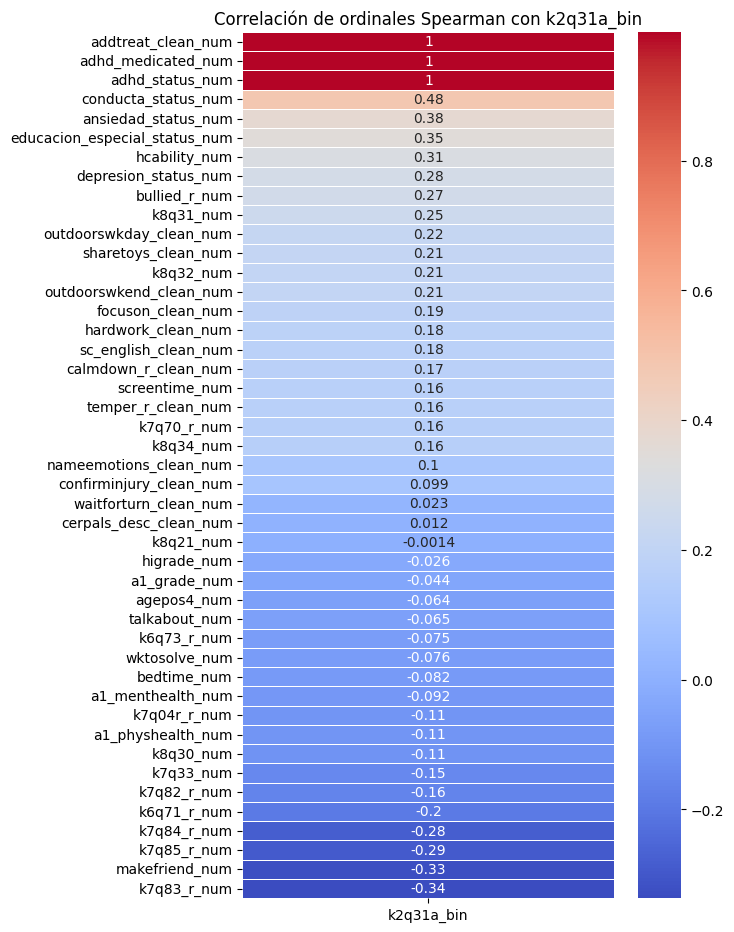

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, len(correlacion_spearman) * 0.25))
sns.heatmap(correlacion_spearman.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlación de ordinales Spearman con k2q31a_bin")
plt.show()


In [ ]:
from scipy.stats import spearmanr
import pandas as pd

# Lista con nombres de columnas codificadas
ordinales_codificadas = [col + "_num" for col in codificaciones_ordinales.keys()]

resultados = []

for var in ordinales_codificadas:
    validos = train_df[[var, "k2q31a_bin"]].dropna()
    rho, p = spearmanr(validos[var], validos["k2q31a_bin"])
    resultados.append((var, rho, p))

tabla_spearman = pd.DataFrame(resultados, columns=["Variable", "Spearman rho", "p-valor"])
tabla_spearman["Significativo (p < 0.05)"] = tabla_spearman["p-valor"] < 0.05
tabla_spearman.sort_values("Spearman rho", ascending=False, inplace=True)


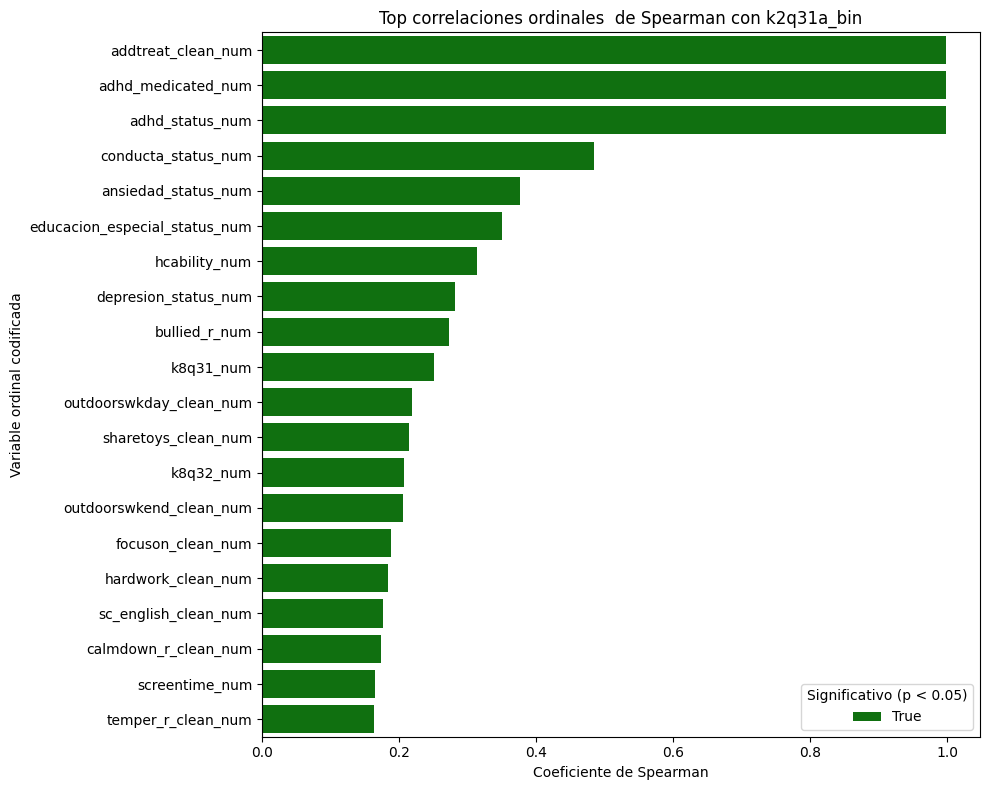

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Elegir cuántas variables mostrar (puedes ajustar n_top)
n_top = 20

# Visualizar las top variables más correlacionadas
plt.figure(figsize=(10, n_top * 0.4))
sns.barplot(
    data=tabla_spearman.head(n_top),
    y="Variable", x="Spearman rho",
    hue="Significativo (p < 0.05)",
    dodge=False, palette={True: "green", False: "red"}
)
plt.axvline(0, color="gray", linestyle="--")
plt.title("Top correlaciones ordinales  de Spearman con k2q31a_bin")
plt.xlabel("Coeficiente de Spearman")
plt.ylabel("Variable ordinal codificada")
plt.tight_layout()
plt.show()


In [ ]:
train_df["k2q31a_bin"].unique()


array([0, 1])

In [ ]:
train_df["addtreat_clean_num"].unique()

array([0, 2, 3, 1])

**Correlaciones variables binarias - variable objetivo**

In [ ]:
# Variables Binarias
binarias = [
    "memorycond", "allergies", "k2q40a", "autoimmune", "headache", "concussion",  "k4q23",
    "ace9", "a1_born", "sc_k2q22", "birthwt_l"
]


In [ ]:
for col in binarias:
    print(f"\n📌 Variable: {col}")
    print(train_df[col].unique())



📌 Variable: memorycond
['No' 'Yes']

📌 Variable: allergies
['No' 'Yes']

📌 Variable: k2q40a
['No' 'Yes']

📌 Variable: autoimmune
['No' 'Yes']

📌 Variable: headache
['No' 'Yes']

📌 Variable: concussion
['No' 'Yes']

📌 Variable: k4q23
['No' 'Yes']

📌 Variable: ace9
['Yes' 'No']

📌 Variable: a1_born
['Outside of the United States' 'In the United States']

📌 Variable: sc_k2q22
['No' 'Yes']

📌 Variable: birthwt_l
['No' 'Yes']


In [ ]:
# Codificamos las variables binarias como 0 y 1
#binaria_map = {
#    'Yes': 1,
#    'No': 0,
#    'In the United States': 1,
#    'Outside of the United States': 0,
#    'Logical skip': np.nan  # Tratarlo como nulo
#}

# Aplicar codificación a cada columna
#for col in binarias:
#    train_df[col + "_bin"] = train_df[col].map(binaria_map)


In [ ]:
# Mapeo genérico para variables binarias 'Yes' / 'No'
binaria_map_generico = {
    'Yes': 1,
    'No': 0,
    'Logical skip': np.nan  # Si aplica en las demás
}

# Aplicar codificación a cada columna genérica
for col in binarias:
    if col != 'a1_born':  # Excluir 'a1_born' de este mapeo
        train_df[col + "_bin"] = train_df[col].map(binaria_map_generico)


In [ ]:
# Mapeo específico para a1_born
a1_born_map = {
    'In the United States': 1,
    'Outside of the United States': 0,
    'Logical skip': np.nan
}

# Aplicar codificación específica
train_df['a1_born_bin'] = train_df['a1_born'].map(a1_born_map)


In [ ]:
# Calculamos correlación Point Biserial junto con Spearman para binaria + binaria
from scipy.stats import spearmanr
import pandas as pd

resultados = []

for col in [b + "_bin" for b in binarias]:
    datos = train_df[[col, "k2q31a_bin"]].dropna()
    if not datos.empty:
        rho, p = spearmanr(datos[col], datos["k2q31a_bin"])
        resultados.append((col, rho, p))

tabla_binarias = pd.DataFrame(resultados, columns=["Variable", "Spearman rho", "p-valor"])
tabla_binarias["Significativo (p < 0.05)"] = tabla_binarias["p-valor"] < 0.05
tabla_binarias.sort_values("Spearman rho", ascending=False, inplace=True)


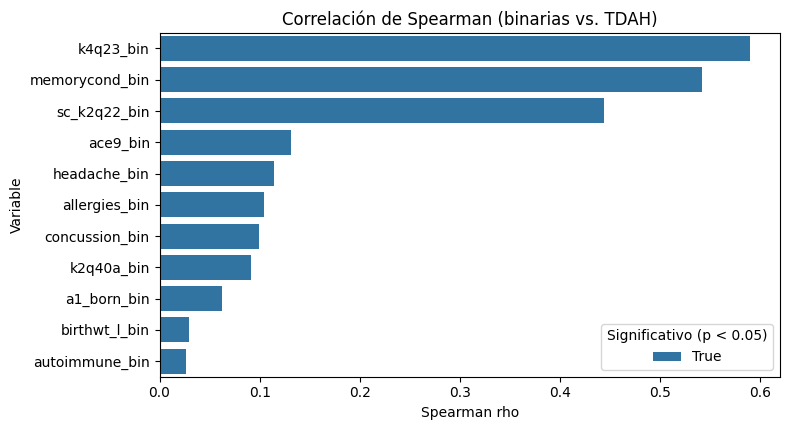

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, len(tabla_binarias) * 0.4))
sns.barplot(data=tabla_binarias, y="Variable", x="Spearman rho", hue="Significativo (p < 0.05)", dodge=False)
plt.axvline(0, color="gray", linestyle="--")
plt.title("Correlación de Spearman (binarias vs. TDAH)")
plt.tight_layout()
plt.show()


**Correlaciones variables categóricas - variable objetivo**

In [ ]:
# Variables Categóricas
categoricas = [
    "hhlanguage", "sc_sex", "a1_marital", "a1_relation", "k3q04_r",
    "grades", "sc_racer", "family_r", "birthwt", "fpl_group"
]

In [ ]:
for col in categoricas:
    print(f"\n📌 Variable: {col}")
    print(train_df[col].unique())


📌 Variable: hhlanguage
['English' 'Other' 'Spanish']

📌 Variable: sc_sex
['Female' 'Male']

📌 Variable: a1_marital
['Divorced' 'Not married, but living with a partner' 'Married'
 'Never Married' 'Separated' 'Widowed']

📌 Variable: a1_relation
['Biological or Adoptive Parent' 'Grandparent' 'Step-parent'
 'Other: Relative' 'Foster Parent' 'Other: Non-Relative']

📌 Variable: k3q04_r
['Yes, this child was covered all 12 months'
 'Yes, but this child had a gap in coverage' 'No']

📌 Variable: grades
["Mostly A's and B's" "This child's school does not give these grades"
 "Mostly B's and C's" "Mostly A's" "Mostly C's and D's"
 "Mostly D's or lower"]

📌 Variable: sc_racer
['White alone' 'Other' 'Black or African American alone']

📌 Variable: family_r
['Single mother' 'Two biogical/adoptive parents, currently married'
 'Two biogical/adoptive parents, not currently married'
 'Two parents (at least one not biological/adoptive), currently married'
 'Two parents (at least one not biological/adoptiv

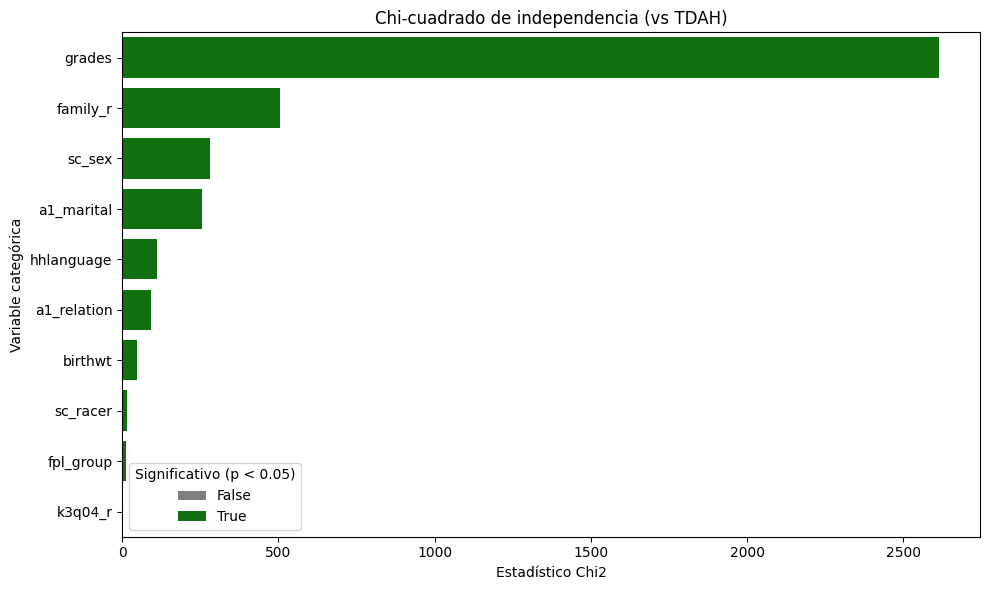

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Lista de tus variables categóricas
categoricas = [
    "hhlanguage", "sc_sex", "a1_marital", "a1_relation", "k3q04_r",
    "grades", "sc_racer", "family_r", "birthwt", "fpl_group"
]

# Guardamos resultados
chi2_resultados = []

for var in categoricas:
    tabla = pd.crosstab(train_df[var], train_df["k2q31a_bin"])
    chi2, p, dof, _ = chi2_contingency(tabla)
    chi2_resultados.append((var, chi2, p))

# Crear DataFrame ordenado por significancia
chi2_df = pd.DataFrame(chi2_resultados, columns=["Variable", "Chi2", "p-valor"])
chi2_df["Significativo (p < 0.05)"] = chi2_df["p-valor"] < 0.05
chi2_df.sort_values("p-valor", inplace=True)

# Mostrar resultados
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=chi2_df,
    y="Variable",
    x="Chi2",
    hue="Significativo (p < 0.05)",
    dodge=False,
    palette={True: "green", False: "gray"}
)
plt.title("Chi-cuadrado de independencia (vs TDAH)")
plt.xlabel("Estadístico Chi2")
plt.ylabel("Variable categórica")
plt.tight_layout()
plt.show()


# Selección de características

In [ ]:
variables_articulo = [
    "sc_age_years", "sc_sex", "a1_age", "allergies", "autoimmune", "k2q40a",
    "concussion", "headache", "k2q32a", "ace9",
    "sc_racer", "family_r", "higrade", "birthwt", "fpl_i1"
]

In [ ]:
# Definir las variables por grupo
ordinales = [
    'addtreat_clean_num', 'adhd_medicated_num', 'adhd_status_num', 'conducta_status_num',
    'ansiedad_status_num', 'educacion_especial_status_num', 'depresion_status_num',
    'hcability_num', 'bullied_r_num', 'k8q31_num', 'k8q32_num',
    'outdoorswkday_clean_num', 'sharetoys_clean_num', 'outdoorswkend_clean_num',
    'focuson_clean_num', 'screentime_num', 'hardwork_clean_num',
    'sc_english_clean_num', 'k7q70_r_num', 'calmdown_r_clean_num', 'higrade_num'
]

binarias = [
    'k4q23_bin', 'memorycond_bin', 'sc_k2q22_bin', 'ace9_bin', 'headache_bin', 'allergies_bin', 'concussion_bin', 'k2q40a_bin',
    'a1_born_bin', 'birthwt_l_bin', 'autoimmune_bin'
]

categoricas = [
    'grades', 'family_r', 'sc_sex', 'fpl_group'
]

numericas = [
    'sc_age_years', 'a1_age', 'birth_yr'
]

# Función para mostrar tipo de dato y valores únicos
def explorar_variables(df, variables, tipo):
    print(f"\n📌 {tipo.upper()} ({len(variables)} variables)")
    for var in variables:
        print(f"\n🔹 Variable: {var}")
        print(f"Tipo de dato: {df[var].dtype}")
        print("Valores únicos:", df[var].unique())

# Usar la función
explorar_variables(train_df, ordinales, "Ordinales")
explorar_variables(train_df, binarias, "Binarias")
explorar_variables(train_df, categoricas, "Categóricas")
explorar_variables(train_df, numericas, "Numéricas")



📌 ORDINALES (21 variables)

🔹 Variable: addtreat_clean_num
Tipo de dato: int64
Valores únicos: [0 2 3 1]

🔹 Variable: adhd_medicated_num
Tipo de dato: int64
Valores únicos: [0 2 1]

🔹 Variable: adhd_status_num
Tipo de dato: int64
Valores únicos: [0 4 1 3 5 2]

🔹 Variable: conducta_status_num
Tipo de dato: int64
Valores únicos: [0 3 5 4 1 2 6]

🔹 Variable: ansiedad_status_num
Tipo de dato: int64
Valores únicos: [0 3 2 1]

🔹 Variable: educacion_especial_status_num
Tipo de dato: int64
Valores únicos: [0 1 2]

🔹 Variable: depresion_status_num
Tipo de dato: int64
Valores únicos: [0 3 1 2]

🔹 Variable: hcability_num
Tipo de dato: int64
Valores únicos: [0 1 3 4 2]

🔹 Variable: bullied_r_num
Tipo de dato: int64
Valores únicos: [0 1 4 2 3]

🔹 Variable: k8q31_num
Tipo de dato: int64
Valores únicos: [0 2 4 1 3]

🔹 Variable: k8q32_num
Tipo de dato: int64
Valores únicos: [0 1 2 3 4]

🔹 Variable: outdoorswkday_clean_num
Tipo de dato: int64
Valores únicos: [4 5 3 2 0 1]

🔹 Variable: sharetoys_clean_

In [ ]:
#Codificación variables categóricas no ordinales - One-Hot Encoding

In [ ]:
# 1. Codificar 'fpl_group' de forma ordinal
fpl_mapping = {
    "Pobreza severa": 0,
    "Pobreza moderada": 1,
    "Ingreso medio-bajo": 2,
    "Ingreso alto": 3
}
train_df["fpl_group_num"] = train_df["fpl_group"].map(fpl_mapping)

# 2. Eliminar 'fpl_group' y 'sc_sex'
#train_df.drop(columns=["fpl_group"], inplace=True)

train_df["sc_sex_bin"] = train_df["sc_sex"].map({"Female": 0, "Male": 1})

# 3. One-Hot Encoding a variables categóricas nominales
train_df = pd.get_dummies(train_df, columns=["grades", "family_r"], drop_first=True)

In [ ]:
# Mostrar columnas resultantes del One-Hot Encoding de 'grades' y 'family_r'
categoricas_codificadas = [col for col in train_df.columns if col.startswith("grades_") or col.startswith("family_r_")]

print("📌 Variables categóricas codificadas:")
for col in categoricas_codificadas:
    print(f"🔹 {col} → Valores únicos: {train_df[col].unique()}")


📌 Variables categóricas codificadas:
🔹 grades_Mostly A's and B's → Valores únicos: [ True False]
🔹 grades_Mostly B's and C's → Valores únicos: [False  True]
🔹 grades_Mostly C's and D's → Valores únicos: [False  True]
🔹 grades_Mostly D's or lower → Valores únicos: [False  True]
🔹 grades_This child's school does not give these grades → Valores únicos: [False  True]
🔹 family_r_Other relation → Valores únicos: [False  True]
🔹 family_r_Single father → Valores únicos: [False  True]
🔹 family_r_Single mother → Valores únicos: [ True False]
🔹 family_r_Two biogical/adoptive parents, currently married → Valores únicos: [False  True]
🔹 family_r_Two biogical/adoptive parents, not currently married → Valores únicos: [False  True]
🔹 family_r_Two parents (at least one not biological/adoptive), currently married → Valores únicos: [False  True]
🔹 family_r_Two parents (at least one not biological/adoptive), not currently married → Valores únicos: [False  True]


In [ ]:
# Mostrar nombres de todas las columnas del dataset
print("📋 Columnas en train_df:")
for col in train_df.columns:
    print(f"🔹 {col}")


📋 Columnas en train_df:
🔹 hhlanguage
🔹 sc_age_years
🔹 sc_sex
🔹 birth_yr
🔹 a1_age
🔹 memorycond
🔹 allergies
🔹 k2q40a
🔹 autoimmune
🔹 headache
🔹 k2q33a
🔹 k2q33b
🔹 k2q32a
🔹 k2q32b
🔹 k2q34a
🔹 k2q34b
🔹 k2q31a
🔹 k2q31b
🔹 k2q31d
🔹 addtreat
🔹 concussion
🔹 confirminjury
🔹 k4q23
🔹 k6q15
🔹 sescurrsvc
🔹 ace9
🔹 cerpals_desc
🔹 k2q34c
🔹 k2q31c
🔹 a1_sex
🔹 a1_born
🔹 a1_grade
🔹 a1_marital
🔹 a1_relation
🔹 a1_physhealth
🔹 a1_menthealth
🔹 k6q70_r
🔹 k6q73_r
🔹 k6q71_r
🔹 k7q84_r
🔹 k7q85_r
🔹 k7q82_r
🔹 k7q83_r
🔹 k7q70_r
🔹 bullied_r
🔹 focuson
🔹 nameemotions
🔹 temper_r
🔹 calmdown_r
🔹 waitforturn
🔹 hardwork
🔹 sharetoys
🔹 talkabout
🔹 wktosolve
🔹 k8q31
🔹 k8q32
🔹 k8q34
🔹 k7q04r_r
🔹 outdoorswkday
🔹 outdoorswkend
🔹 screentime
🔹 hcability
🔹 k8q21
🔹 k8q30
🔹 k7q33
🔹 bedtime
🔹 k3q04_r
🔹 makefriend
🔹 sc_english
🔹 sc_k2q22
🔹 agepos4
🔹 sc_racer
🔹 birthwt_l
🔹 birthwt
🔹 birth_yr_f
🔹 higrade
🔹 fpl_i1
🔹 ansiedad_status
🔹 depresion_status
🔹 conducta_status
🔹 adhd_status
🔹 adhd_medicated
🔹 educacion_especial_status
🔹 fpl_i1_log
🔹 fpl

In [ ]:
train_df.head()


,hhlanguage,sc_age_years,sc_sex,birth_yr,a1_age,memorycond,allergies,k2q40a,autoimmune,headache,...,grades_Mostly C's and D's,grades_Mostly D's or lower,grades_This child's school does not give these grades,family_r_Other relation,family_r_Single father,family_r_Single mother,"family_r_Two biogical/adoptive parents, currently married","family_r_Two biogical/adoptive parents, not currently married","family_r_Two parents (at least one not biological/adoptive), currently married","family_r_Two parents (at least one not biological/adoptive), not currently married"
2,English,4,Female,2018,39,No,No,No,No,No,...,False,False,False,False,False,True,False,False,False,False
3,English,6,Female,2017,28,No,No,No,No,No,...,False,False,True,False,False,True,False,False,False,False
4,English,9,Male,2014,33,No,No,No,No,No,...,False,False,False,False,False,False,True,False,False,False
5,English,5,Male,2017,47,No,No,No,No,No,...,False,False,False,False,False,False,True,False,False,False
6,English,4,Male,2019,38,No,No,No,No,No,...,False,False,False,False,False,False,True,False,False,False


# SEPARACIÓN DE DATASET PARA ENTRENAMIENTO DEL MODELO

In [ ]:
# Paso previo si estás en Google Colab y aún no has montado tu Google Drive:
# from google.colab import drive
# drive.mount('/content/drive')

# Listas de variables por tipo
ordinales = [
    'addtreat_clean_num', 'adhd_medicated_num', 'adhd_status_num', 'conducta_status_num',
    'ansiedad_status_num', 'educacion_especial_status_num', 'depresion_status_num',
    'hcability_num', 'bullied_r_num', 'k8q31_num', 'k8q32_num',
    'outdoorswkday_clean_num', 'sharetoys_clean_num', 'outdoorswkend_clean_num',
    'focuson_clean_num', 'screentime_num', 'hardwork_clean_num',
    'sc_english_clean_num', 'k7q70_r_num', 'calmdown_r_clean_num', 'higrade_num',
    'makefriend_num', 'k7q84_r_num'
]

binarias = [
    'k4q23_bin', 'memorycond_bin', 'sc_k2q22_bin', 'ace9_bin', 'headache_bin', 'allergies_bin', 'concussion_bin', 'k2q40a_bin',
    'a1_born_bin', 'birthwt_l_bin', 'autoimmune_bin'
]

categoricas = [
    'fpl_group_num', 'sc_sex_bin',
    "grades_Mostly A's and B's", "grades_Mostly B's and C's", "grades_Mostly C's and D's",
    "grades_Mostly D's or lower", "grades_This child's school does not give these grades",
    'family_r_Other relation', 'family_r_Single father', 'family_r_Single mother',
    'family_r_Two biogical/adoptive parents, currently married',
    'family_r_Two biogical/adoptive parents, not currently married',
    'family_r_Two parents (at least one not biological/adoptive), currently married',
    'family_r_Two parents (at least one not biological/adoptive), not currently married'
]

numericas = ['sc_age_years', 'a1_age', 'birth_yr']

# Unir todas las variables predictoras
final_features = ordinales + binarias + categoricas + numericas

# Crear nuevo DataFrame con las variables predictoras
train_df_model = train_df[final_features].copy()

# Añadir la variable objetivo
train_df_model['k2q31a_bin'] = train_df['k2q31a_bin']

# Mostrar valores únicos por columna (máx. 10)
print("Valores únicos por variable (máximo 10):")
for col in train_df_model.columns:
    print(f"{col}: {train_df_model[col].unique()[:10]}")

# Mostrar las primeras filas
print("\nPrimeras filas del dataset final:")
display(train_df_model.head())

# Guardar el dataset final como CSV en tu Drive
train_df_model.to_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/data/train_df_model.csv', index=False)
print("\n✅ Dataset final guardado como 'train_df_model.csv' en tu Google Drive.")


Valores únicos por variable (máximo 10):
addtreat_clean_num: [0 2 3 1]
adhd_medicated_num: [0 2 1]
adhd_status_num: [0 4 1 3 5 2]
conducta_status_num: [0 3 5 4 1 2 6]
ansiedad_status_num: [0 3 2 1]
educacion_especial_status_num: [0 1 2]
depresion_status_num: [0 3 1 2]
hcability_num: [0 1 3 4 2]
bullied_r_num: [0 1 4 2 3]
k8q31_num: [0 2 4 1 3]
k8q32_num: [0 1 2 3 4]
outdoorswkday_clean_num: [4 5 3 2 0 1]
sharetoys_clean_num: [5 3 4 0 2 1]
outdoorswkend_clean_num: [5 3 2 4 0 1]
focuson_clean_num: [5 4 3 0 2 1]
screentime_num: [1 2 0 4 3]
hardwork_clean_num: [4 3 1 0 5 2]
sc_english_clean_num: [4 3 0 2 1]
k7q70_r_num: [1 3 2 0]
calmdown_r_clean_num: [1 3 4 0 5 2]
higrade_num: [1 2 0]
makefriend_num: [2 0 1]
k7q84_r_num: [2 1 3 0]
k4q23_bin: [0. 1.]
memorycond_bin: [0. 1.]
sc_k2q22_bin: [0. 1.]
ace9_bin: [1. 0.]
headache_bin: [0. 1.]
allergies_bin: [0. 1.]
concussion_bin: [0. 1.]
k2q40a_bin: [0. 1.]
a1_born_bin: [0. 1.]
birthwt_l_bin: [0. 1.]
autoimmune_bin: [0. 1.]
fpl_group_num: [1, 2, 

,addtreat_clean_num,adhd_medicated_num,adhd_status_num,conducta_status_num,ansiedad_status_num,educacion_especial_status_num,depresion_status_num,hcability_num,bullied_r_num,k8q31_num,...,family_r_Single father,family_r_Single mother,"family_r_Two biogical/adoptive parents, currently married","family_r_Two biogical/adoptive parents, not currently married","family_r_Two parents (at least one not biological/adoptive), currently married","family_r_Two parents (at least one not biological/adoptive), not currently married",sc_age_years,a1_age,birth_yr,k2q31a_bin
2,0,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,4,39,2018,0
3,0,0,0,0,0,0,0,0,1,0,...,False,True,False,False,False,False,6,28,2017,0
4,0,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,9,33,2014,0
5,0,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,5,47,2017,0
6,0,0,0,0,0,0,0,1,0,0,...,False,False,True,False,False,False,4,38,2019,0



✅ Dataset final guardado como 'train_df_model.csv' en tu Google Drive.


In [ ]:
print("📋 Lista completa de columnas en train_df:\n")
for col in train_df_model.columns:
    print(col)


📋 Lista completa de columnas en train_df:

addtreat_clean_num
adhd_medicated_num
adhd_status_num
conducta_status_num
ansiedad_status_num
educacion_especial_status_num
depresion_status_num
hcability_num
bullied_r_num
k8q31_num
k8q32_num
outdoorswkday_clean_num
sharetoys_clean_num
outdoorswkend_clean_num
focuson_clean_num
screentime_num
hardwork_clean_num
sc_english_clean_num
k7q70_r_num
calmdown_r_clean_num
higrade_num
makefriend_num
k7q84_r_num
k4q23_bin
memorycond_bin
sc_k2q22_bin
ace9_bin
headache_bin
allergies_bin
concussion_bin
k2q40a_bin
a1_born_bin
birthwt_l_bin
autoimmune_bin
fpl_group_num
sc_sex_bin
grades_Mostly A's and B's
grades_Mostly B's and C's
grades_Mostly C's and D's
grades_Mostly D's or lower
grades_This child's school does not give these grades
family_r_Other relation
family_r_Single father
family_r_Single mother
family_r_Two biogical/adoptive parents, currently married
family_r_Two biogical/adoptive parents, not currently married
family_r_Two parents (at least one n

In [ ]:
import numpy as np

# Diccionario corregido (sin comillas para True/False)
binaria_map_2 = {
    True: 1,
    False: 0,
    'Logical skip': np.nan
}

columnas_booleanas = [
    "grades_Mostly A's and B's",
    "grades_Mostly B's and C's",
    "grades_Mostly C's and D's",
    "grades_Mostly D's or lower",
    "grades_This child's school does not give these grades",
    "family_r_Other relation",
    "family_r_Single father",
    "family_r_Single mother",
    "family_r_Two biogical/adoptive parents, currently married",
    "family_r_Two biogical/adoptive parents, not currently married",
    "family_r_Two parents (at least one not biological/adoptive), currently married",
    "family_r_Two parents (at least one not biological/adoptive), not currently married"
]

# Aplicar codificación
for col in columnas_booleanas:
    if col in train_df_model.columns:
        train_df_model[col] = train_df_model[col].map(binaria_map_2)
    else:
        print(f"❌ Columna no encontrada: {col}")


In [ ]:
# Mostrar valores únicos por columna (máx. 10)
print("Valores únicos por variable (máximo 10):")
for col in train_df_model.columns:
    print(f"{col}: {train_df_model[col].unique()[:10]}")

Valores únicos por variable (máximo 10):
addtreat_clean_num: [0 2 3 1]
adhd_medicated_num: [0 2 1]
adhd_status_num: [0 4 1 3 5 2]
conducta_status_num: [0 3 5 4 1 2 6]
ansiedad_status_num: [0 3 2 1]
educacion_especial_status_num: [0 1 2]
depresion_status_num: [0 3 1 2]
hcability_num: [0 1 3 4 2]
bullied_r_num: [0 1 4 2 3]
k8q31_num: [0 2 4 1 3]
k8q32_num: [0 1 2 3 4]
outdoorswkday_clean_num: [4 5 3 2 0 1]
sharetoys_clean_num: [5 3 4 0 2 1]
outdoorswkend_clean_num: [5 3 2 4 0 1]
focuson_clean_num: [5 4 3 0 2 1]
screentime_num: [1 2 0 4 3]
hardwork_clean_num: [4 3 1 0 5 2]
sc_english_clean_num: [4 3 0 2 1]
k7q70_r_num: [1 3 2 0]
calmdown_r_clean_num: [1 3 4 0 5 2]
higrade_num: [1 2 0]
makefriend_num: [2 0 1]
k7q84_r_num: [2 1 3 0]
k4q23_bin: [0. 1.]
memorycond_bin: [0. 1.]
sc_k2q22_bin: [0. 1.]
ace9_bin: [1. 0.]
headache_bin: [0. 1.]
allergies_bin: [0. 1.]
concussion_bin: [0. 1.]
k2q40a_bin: [0. 1.]
a1_born_bin: [0. 1.]
birthwt_l_bin: [0. 1.]
autoimmune_bin: [0. 1.]
fpl_group_num: [1, 2, 

In [ ]:
# Diccionarios de mapeo (los que usaste para codificar)
fpl_mapping = {
    "Pobreza severa": 0,
    "Pobreza moderada": 1,
    "Ingreso medio-bajo": 2,
    "Ingreso alto": 3
}

sc_sex_mapping = {
    "Female": 0,
    "Male": 1
}

codificaciones_ordinales = {
    "a1_grade": {
        '8th grade or less': 0,
        '9th-12th grade': 1,
        'High School Graduate or GED Completed': 2,
        'Completed a vocational, trade, or business school program': 3,
        'Some College Credit, but No Degree': 4,
        'Associate Degree (AA, AS)': 5,
        "Bachelor's Degree (BA, BS, AB)": 6,
        "Master's Degree (MA, MS, MSW, MBA)": 7,
        'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, JD)': 8
    },
    "a1_menthealth": {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4},
    "k6q73_r": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "k6q71_r": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "k7q84_r": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "k7q85_r": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "k7q82_r": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "k7q83_r": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "k7q70_r": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "bullied_r": {
        'Never (in the past 12 months)': 0,
        '1-2 times (in the past 12 months)': 1,
        '1-2 times per month': 2,
        '1-2 times per week': 3,
        'Almost every day': 4
    },
    "talkabout": {'None of the time': 0, 'Some of the time': 1, 'Most of the time': 2, 'All of the time': 3},
    "wktosolve": {'None of the time': 0, 'Some of the time': 1, 'Most of the time': 2, 'All of the time': 3},
    "k8q31": {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Usually': 3, 'Always': 4},
    "makefriend": {'A lot of difficulty': 0, 'A little difficulty': 1, 'No difficulty': 2},
    "higrade": {
        'Less than high school': 0,
        'High school (including vocational, trade, or business school)': 1,
        'More than high school': 2
    },
    "k8q32": {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Usually': 3, 'Always': 4},
    "k8q34": {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Usually': 3, 'Always': 4},
    "k7q04r_r": {'1 time': 0, '2 or more times': 1},
    "screentime": {'Less than 1 hour': 0, '1 hour': 1, '2 hours': 2, '3 hours': 3, '4 or more hours': 4},
    "hcability": {
        'This child does not have any health conditions': 0,
        'Never': 1, 'Sometimes': 2, 'Usually': 3, 'Always': 4
    },
    "k8q21": {'Not well at all': 0, 'Not very well': 1, 'Somewhat well': 2, 'Very well': 3},
    "k8q30": {'Not well at all': 0, 'Not very well': 1, 'Somewhat well': 2, 'Very well': 3},
    "k7q33": {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Usually': 3, 'Always': 4},
    "bedtime": {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Usually': 3, 'Always': 4},
    "agepos4": {
        'Only child': 0, 'Oldest child': 1, 'Second oldest child': 2,
        'Third oldest child': 3, 'Fourth or greater oldest child': 4
    },
    "a1_physhealth": {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4},
    "a1_menthealth": {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4},
    "ansiedad_status": {
        "Nunca diagnosticado": 0,
        "Diagnosticado pero ya no lo tiene": 1,
        "Diagnosticado pero estado actual desconocido": 2,
        "Diagnosticado y lo tiene actualmente": 3
    },
    "depresion_status": {
        "Nunca diagnosticado": 0,
        "Diagnosticado pero ya no lo tiene": 1,
        "Diagnosticado pero estado actual desconocido": 2,
        "Diagnosticado y lo tiene actualmente": 3
    },
    "conducta_status": {
        "Nunca diagnosticado": 0,
        "Diagnosticado pero ya no lo tiene": 1,
        "Alguna vez diagnosticado (estado actual desconocido)": 2,
        "Lo tiene actualmente, leve": 3,
        "Lo tiene actualmente, moderado": 4,
        "Lo tiene actualmente, grave": 5,
        "Diagnóstico actual, severidad desconocida": 6
    },
    "adhd_status": {
        "Nunca diagnosticado": 0,
        "Diagnosticado pero ya no lo tiene": 1,
        "Diagnosticado pero estado actual desconocido": 2,
        "Lo tiene actualmente, leve": 3,
        "Lo tiene actualmente, moderado": 4,
        "Lo tiene actualmente, grave": 5
    },
    "adhd_medicated": {
        "Nunca diagnosticado": 0,
        "Diagnosticado pero sin tratamiento": 1,
        "Diagnosticado y actualmente en tratamiento": 2
    },
    "educacion_especial_status": {
        "Nunca ha tenido plan especial de educación": 0,
        "Tuvo plan, ya no recibe servicios de educación especial": 1,
        "Tiene plan y recibe servicios de educación especial": 2
    },
    "sc_english_clean": {
        "Not at all": 1, "Not well": 2, "Well": 3, "Very Well": 4, "Too young": 0
    },
    "outdoorswkend_clean": {
        "Too young (<3 years)": 0,
        "Less than 1 hour per day": 1,
        "1 hour per day": 2,
        "2 hours per day": 3,
        "3 hours per day": 4,
        "4 or more hours per day": 5
    },
    "cerpals_desc_clean": {
        "No Paralisis Cerebral": 0, "Mild": 1, "Moderate": 2, "Severe": 3
    },
    "outdoorswkday_clean": {
        "Too young (<3 years)": 0,
        "Less than 1 hour per day": 1,
        "1 hour per day": 2,
        "2 hours per day": 3,
        "3 hours per day": 4,
        "4 or more hours per day": 5
    },
    "sharetoys_clean": {
        "Too young (<3 years)": 0,
        "Never": 1,
        "About half the time": 2,
        "Sometimes": 3,
        "Most of the time": 4,
        "Always": 5
    },
    "hardwork_clean": {
        "Too young (<3 years)": 0,
        "Never": 1,
        "About half the time": 2,
        "Sometimes": 3,
        "Most of the time": 4,
        "Always": 5
    },
    "waitforturn_clean": {
        "Too young (<3 years)": 0,
        "Never": 1,
        "About half the time": 2,
        "Sometimes": 3,
        "Most of the time": 4,
        "Always": 5
    },
    "calmdown_r_clean": {
        "Too young (<3 years)": 0,
        "Never": 1,
        "About half the time": 2,
        "Sometimes": 3,
        "Most of the time": 4,
        "Always": 5
    },
    "temper_r_clean": {
        "Too young (<3 years)": 0,
        "Never": 1,
        "About half the time": 2,
        "Sometimes": 3,
        "Most of the time": 4,
        "Always": 5
    },
    "nameemotions_clean": {
        "Too young (<3 years)": 0,
        "Never": 1,
        "About half the time": 2,
        "Sometimes": 3,
        "Most of the time": 4,
        "Always": 5
    },
    "focuson_clean": {
        "Too young (<3 years)": 0,
        "Never": 1,
        "About half the time": 2,
        "Sometimes": 3,
        "Most of the time": 4,
        "Always": 5
    },
    "confirminjury_clean": {
        "No concussion suspected": 0,
        "Not confirmed": 1,
        "Did not seek medical care": 2,
        "Confirmed": 3
    },
    "addtreat_clean": {
        "No ADD/ADHD": 0,
        "No info": 1,
        "Not treated": 2,
        "Treated": 3
    }
}


**ESTANDARIZACIÓN**

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Separar X e y

X = train_df_model.drop(columns='k2q31a_bin')  # Asegúrate de que esta es tu variable objetivo
y = train_df_model['k2q31a_bin']

# 2. Aplicar estandarización
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)

# 3. Convertir el array escalado de nuevo a DataFrame (con nombres de columnas)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)

# (Opcional) Verificación rápida
print(X_scaled.describe().round(2))


       addtreat_clean_num  adhd_medicated_num  adhd_status_num  \
count            30377.00            30377.00         30377.00   
mean                 0.00                0.00             0.00   
std                  1.00                1.00             1.00   
min                 -0.35               -0.34            -0.34   
25%                 -0.35               -0.34            -0.34   
50%                 -0.35               -0.34            -0.34   
75%                 -0.35               -0.34            -0.34   
max                  3.46                3.59             3.93   

       conducta_status_num  ansiedad_status_num  \
count             30377.00             30377.00   
mean                  0.00                 0.00   
std                   1.00                 1.00   
min                  -0.29                -0.39   
25%                  -0.29                -0.39   
50%                  -0.29                -0.39   
75%                  -0.29                -0.39 

**BALANCEO DE CLASES**

In [ ]:
# Verificamos que las clases esten desbalanceadas
print(y.value_counts(normalize=True))


k2q31a_bin
0    0.88804
1    0.11196
Name: proportion, dtype: float64


In [ ]:
import numpy as np
import pandas as pd

# Suponemos que ya tienes cargado tu DataFrame:
# train_df_model = pd.read_csv(...) o como lo tengas

# Creamos una copia para no modificar el original
df = train_df_model.copy()
df_decodificado = df.copy()

# Diccionarios de mapeo
mapeos_directos = {
    "addtreat_clean_num": {
        "No ADD/ADHD": 0, "No info": 1, "Not treated": 2, "Treated": 3
    },
    "adhd_medicated_num": {
        "Nunca diagnosticado": 0, "Diagnosticado pero sin tratamiento": 1,
        "Diagnosticado y actualmente en tratamiento": 2
    },
    "adhd_status_num": {
        "Nunca diagnosticado": 0, "Diagnosticado pero ya no lo tiene": 1,
        "Diagnosticado pero estado actual desconocido": 2, "Lo tiene actualmente, leve": 3,
        "Lo tiene actualmente, moderado": 4, "Lo tiene actualmente, grave": 5
    },
    "conducta_status_num": {
        "Nunca diagnosticado": 0, "Diagnosticado pero ya no lo tiene": 1,
        "Alguna vez diagnosticado (estado actual desconocido)": 2, "Lo tiene actualmente, leve": 3,
        "Lo tiene actualmente, moderado": 4, "Lo tiene actualmente, grave": 5,
        "Diagnóstico actual, severidad desconocida": 6
    },
    "ansiedad_status_num": {
        "Nunca diagnosticado": 0, "Diagnosticado pero ya no lo tiene": 1,
        "Diagnosticado pero estado actual desconocido": 2, "Diagnosticado y lo tiene actualmente": 3
    },
    "educacion_especial_status_num": {
        "Nunca ha tenido plan especial de educación": 0,
        "Tuvo plan, ya no recibe servicios de educación especial": 1,
        "Tiene plan y recibe servicios de educación especial": 2
    },
    "depresion_status_num": {
        "Nunca diagnosticado": 0, "Diagnosticado pero ya no lo tiene": 1,
        "Diagnosticado pero estado actual desconocido": 2, "Diagnosticado y lo tiene actualmente": 3
    },
    "hcability_num": {
        'This child does not have any health conditions': 0, 'Never': 1,
        'Sometimes': 2, 'Usually': 3, 'Always': 4
    },
    "bullied_r_num": {
        'Never (in the past 12 months)': 0, '1-2 times (in the past 12 months)': 1,
        '1-2 times per month': 2, '1-2 times per week': 3, 'Almost every day': 4
    },
    "k8q31_num": {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Usually': 3, 'Always': 4},
    "k8q32_num": {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Usually': 3, 'Always': 4},
    "outdoorswkday_clean_num": {
        "Too young (<3 years)": 0, "Less than 1 hour per day": 1, "1 hour per day": 2,
        "2 hours per day": 3, "3 hours per day": 4, "4 or more hours per day": 5
    },
    "sharetoys_clean_num": {
        "Too young (<3 years)": 0, "Never": 1, "About half the time": 2,
        "Sometimes": 3, "Most of the time": 4, "Always": 5
    },
    "outdoorswkend_clean_num": {
        "Too young (<3 years)": 0, "Less than 1 hour per day": 1, "1 hour per day": 2,
        "2 hours per day": 3, "3 hours per day": 4, "4 or more hours per day": 5
    },
    "focuson_clean_num": {
        "Too young (<3 years)": 0, "Never": 1, "About half the time": 2,
        "Sometimes": 3, "Most of the time": 4, "Always": 5
    },
    "screentime_num": {
        'Less than 1 hour': 0, '1 hour': 1, '2 hours': 2, '3 hours': 3, '4 or more hours': 4
    },
    "hardwork_clean_num": {
        "Too young (<3 years)": 0, "Never": 1, "About half the time": 2,
        "Sometimes": 3, "Most of the time": 4, "Always": 5
    },
    "sc_english_clean_num": {
        "Too young": 0, "Not at all": 1, "Not well": 2, "Well": 3, "Very Well": 4
    },
    "k7q70_r_num": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3},
    "calmdown_r_clean_num": {
        "Too young (<3 years)": 0, "Never": 1, "About half the time": 2,
        "Sometimes": 3, "Most of the time": 4, "Always": 5
    },
    "higrade_num": {
        'Less than high school': 0,
        'High school (including vocational, trade, or business school)': 1,
        'More than high school': 2
    },
    "a1_born_bin": {
      'In the United States': 1,
      'Outside of the United States': 0,
    },
    "makefriend_num": {'A lot of difficulty': 0, 'A little difficulty': 1, 'No difficulty': 2},
    "k7q84_r_num": {'Never': 0, 'Sometimes': 1, 'Usually': 2, 'Always': 3}
}

binaria_map = {
    'Yes': 1,
    'No': 0,
    'Logical skip': np.nan
}

binaria_map_2 = {
    True: 1,
    False: 0,
    'Logical skip': np.nan
}



fpl_mapping = {
    "Pobreza severa": 0,
    "Pobreza moderada": 1,
    "Ingreso medio-bajo": 2,
    "Ingreso alto": 3
}

# Lista de variables que usan binaria_map_2
binaria_map_2_vars = [
    "grades_Mostly A's and B's", "grades_Mostly B's and C's", "grades_Mostly C's and D's",
    "grades_Mostly D's or lower", "grades_This child's school does not give these grades",
    "family_r_Other relation", "family_r_Single father", "family_r_Single mother",
    "family_r_Two biogical/adoptive parents, currently married",
    "family_r_Two biogical/adoptive parents, not currently married",
    "family_r_Two parents (at least one not biological/adoptive), currently married",
    "family_r_Two parents (at least one not biological/adoptive), not currently married"
]

# Variables a excluir del desmapeo
excluir = ["sc_age_years", "a1_age", "birth_yr"]

# Aplicar los mapeos inversos
for col in df.columns:
    if col in excluir:
        continue
    elif col in mapeos_directos:
        mapping = mapeos_directos[col]
        inv_map = {v: k for k, v in mapping.items()}
        df_decodificado[col] = df[col].map(inv_map)
    elif col.endswith("_bin"):
        inv_map = {v: k for k, v in binaria_map_generico.items() if v in [0, 1]}
        df_decodificado[col] = df[col].map(inv_map)
    elif col in binaria_map_2_vars:
        inv_map = {v: k for k, v in binaria_map_2.items() if v in [0, 1]}
        df_decodificado[col] = df[col].map(inv_map)
    elif col == "fpl_group_num":
        inv_map = {v: k for k, v in fpl_mapping.items()}
        df_decodificado[col] = df[col].map(inv_map)

# Resultado: df_decodificado contiene las variables desmapeadas y legibles
# Guardar el dataset final como CSV en tu Drive
df_decodificado.to_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto-TFG/data/train_df_decoded.csv', index=False)
print("\n✅ Dataset final guardado como 'train_df_decoded.csv' en tu Google Drive.")



✅ Dataset final guardado como 'train_df_decoded.csv' en tu Google Drive.


In [ ]:
# Mostrar valores únicos por columna (máx. 10)
print("Valores únicos por variable (máximo 10):")
for col in df_decodificado.columns:
    print(f"{col}: {df_decodificado[col].unique()[:10]}")

Valores únicos por variable (máximo 10):
addtreat_clean_num: ['No ADD/ADHD' 'Not treated' 'Treated' 'No info']
adhd_medicated_num: ['Nunca diagnosticado' 'Diagnosticado y actualmente en tratamiento'
 'Diagnosticado pero sin tratamiento']
adhd_status_num: ['Nunca diagnosticado' 'Lo tiene actualmente, moderado'
 'Diagnosticado pero ya no lo tiene' 'Lo tiene actualmente, leve'
 'Lo tiene actualmente, grave'
 'Diagnosticado pero estado actual desconocido']
conducta_status_num: ['Nunca diagnosticado' 'Lo tiene actualmente, leve'
 'Lo tiene actualmente, grave' 'Lo tiene actualmente, moderado'
 'Diagnosticado pero ya no lo tiene'
 'Alguna vez diagnosticado (estado actual desconocido)'
 'Diagnóstico actual, severidad desconocida']
ansiedad_status_num: ['Nunca diagnosticado' 'Diagnosticado y lo tiene actualmente'
 'Diagnosticado pero estado actual desconocido'
 'Diagnosticado pero ya no lo tiene']
educacion_especial_status_num: ['Nunca ha tenido plan especial de educación'
 'Tuvo plan, ya no re